## Exploratory Data Analysis

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [2]:
df_quantitative= pd.read_pickle("ProcessedData/proccessed_quantitatvie_data.pkl")

In [3]:
df_quantitative_features=df_quantitative.drop(columns=["participant_id"])

In [7]:
df_quantitative_features.head()

EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
0          40.00                  13.0             3.0            10.0   
1         -94.47                  14.0             3.0            13.0   
2         -46.67                  14.0             4.0            10.0   
3         -26.68                  10.0             5.0            12.0   
4           0.00                  14.0             5.0            15.0   

   APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
0             47.0             13.0            11.0            28.0   
1             34.0             18.0            23.0            30.0   
2             35.0             16.0            10.0            29.0   
3             39.0             19.0            16.0            28.0   
4             40.0             20.0            24.0            28.0   

   SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0                       0.0                         6.0   
1                       0.0                        18.0   
2                       1.0                        14.0   
3                       6.0                        24.0   
4                       1.0                        18.0   

   SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                         1.0                    5.0   
1                         6.0                    8.0   
2                         2.0                    8.0   
3                         4.0                   16.0   
4                         4.0                   11.0   

   SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                        0.0                    5.0                    1.0   
1                        7.0                    8.0                   10.0   
2                        5.0                    7.0                    6.0   
3                        9.0                   10.0                    8.0   
4                        4.0                   10.0                    7.0   

   SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  \
0                    0.0               10.0               8.979603   
1                    4.0                5.0              12.734177   
2                    4.0                9.0               8.239904   
3                    4.0                6.0               9.523203   
4                    3.0                9.0               8.940679   

   ADHD_Outcome  Sex_F  
0             1      1  
1             1      0  
2             1      0  
3             1      1  
4             1      1

In [15]:
df_quantitative_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EHQ_EHQ_Total               1213 non-null   float64
 1   ColorVision_CV_Score        1213 non-null   float64
 2   APQ_P_APQ_P_CP              1213 non-null   float64
 3   APQ_P_APQ_P_ID              1213 non-null   float64
 4   APQ_P_APQ_P_INV             1213 non-null   float64
 5   APQ_P_APQ_P_OPD             1213 non-null   float64
 6   APQ_P_APQ_P_PM              1213 non-null   float64
 7   APQ_P_APQ_P_PP              1213 non-null   float64
 8   SDQ_SDQ_Conduct_Problems    1213 non-null   float64
 9   SDQ_SDQ_Difficulties_Total  1213 non-null   float64
 10  SDQ_SDQ_Emotional_Problems  1213 non-null   float64
 11  SDQ_SDQ_Externalizing       1213 non-null   float64
 12  SDQ_SDQ_Generating_Impact   1213 non-null   float64
 13  SDQ_SDQ_Hyperactivity       1213 

In [17]:
# For missing data handling
df_quantitative_features = df_quantitative_features.fillna(df_quantitative_features.mean())  # Impute with mean for numeric columns
# Alternatively, you can drop columns with too many missing values
df_quantitative_features = df_quantitative_features.dropna(axis=1, thresh=int(0.9*len(df_quantitative_features)))  # Keep columns with at least 90% data


In [19]:
df_quantitative_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EHQ_EHQ_Total               1213 non-null   float64
 1   ColorVision_CV_Score        1213 non-null   float64
 2   APQ_P_APQ_P_CP              1213 non-null   float64
 3   APQ_P_APQ_P_ID              1213 non-null   float64
 4   APQ_P_APQ_P_INV             1213 non-null   float64
 5   APQ_P_APQ_P_OPD             1213 non-null   float64
 6   APQ_P_APQ_P_PM              1213 non-null   float64
 7   APQ_P_APQ_P_PP              1213 non-null   float64
 8   SDQ_SDQ_Conduct_Problems    1213 non-null   float64
 9   SDQ_SDQ_Difficulties_Total  1213 non-null   float64
 10  SDQ_SDQ_Emotional_Problems  1213 non-null   float64
 11  SDQ_SDQ_Externalizing       1213 non-null   float64
 12  SDQ_SDQ_Generating_Impact   1213 non-null   float64
 13  SDQ_SDQ_Hyperactivity       1213 

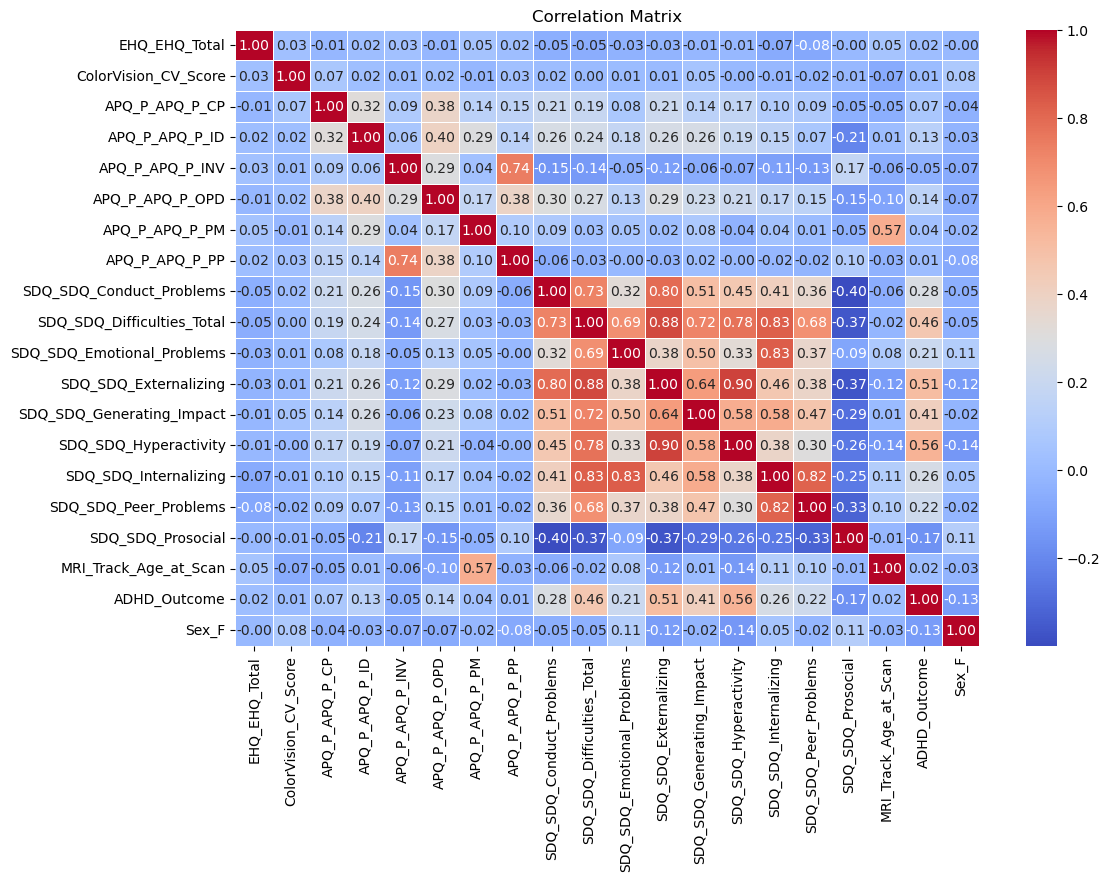

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = df_quantitative_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [25]:
df_quantitative['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

In [29]:
import pandas as pd

# Assuming df_quantitative is your dataframe
# Calculate the correlation matrix
correlation_matrix = df_quantitative_features.corr()

# Create a mask to filter correlations greater than 0.4
high_correlation = correlation_matrix[(correlation_matrix.abs() > 0.4) & (correlation_matrix != 1)]

# To get a more readable output, you can filter out NaNs and just display the features that are highly correlated
high_correlation = high_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Print the feature pairs with correlation greater than 0.4
print("Features with correlation > 0.4:\n")
print(high_correlation)

# Optionally, list the feature pairs only
correlation_pairs = high_correlation.stack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\nFeature pairs with correlation > 0.4:\n")
print(correlation_pairs)


Features with correlation > 0.4:

                            APQ_P_APQ_P_INV  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
APQ_P_APQ_P_INV                         NaN             NaN        0.739292   
APQ_P_APQ_P_PM                          NaN             NaN             NaN   
APQ_P_APQ_P_PP                     0.739292             NaN             NaN   
SDQ_SDQ_Conduct_Problems                NaN             NaN             NaN   
SDQ_SDQ_Difficulties_Total              NaN             NaN             NaN   
SDQ_SDQ_Emotional_Problems              NaN             NaN             NaN   
SDQ_SDQ_Externalizing                   NaN             NaN             NaN   
SDQ_SDQ_Generating_Impact               NaN             NaN             NaN   
SDQ_SDQ_Hyperactivity                   NaN             NaN             NaN   
SDQ_SDQ_Internalizing                   NaN             NaN             NaN   
SDQ_SDQ_Peer_Problems                   NaN             NaN             NaN   
MRI_Track_Age_at_S

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Example of SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Example of random undersampling
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)


NameError: name 'X' is not defined

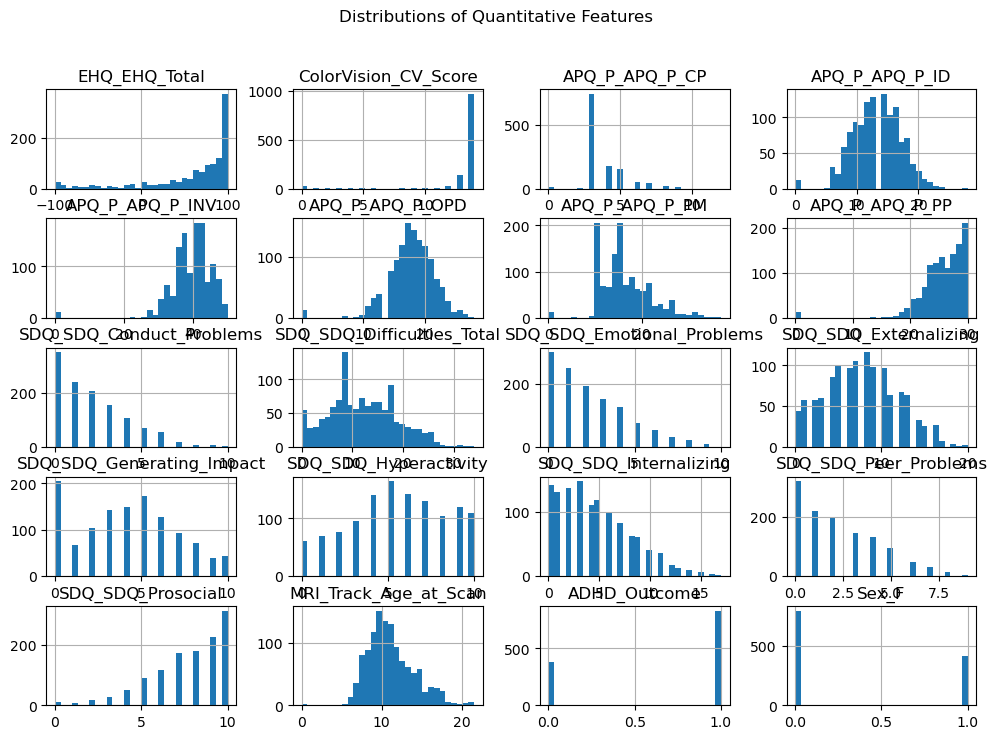

In [9]:
df_quantitative_features.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distributions of Quantitative Features")
plt.show()


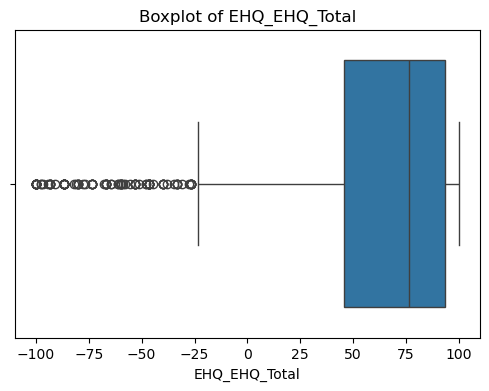

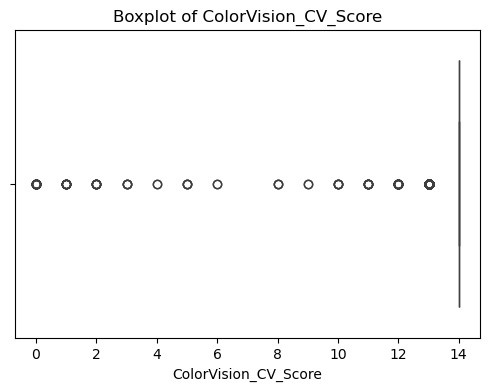

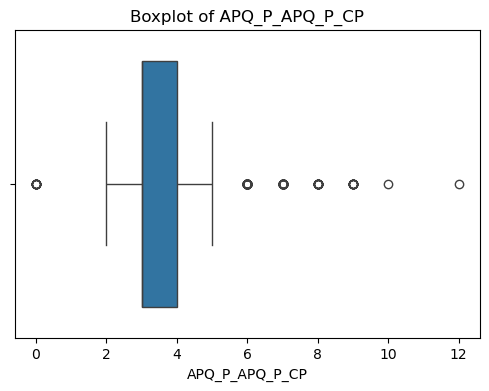

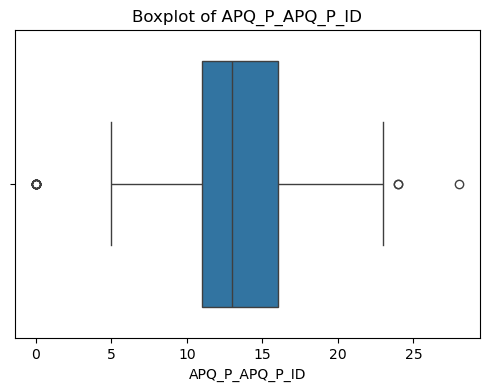

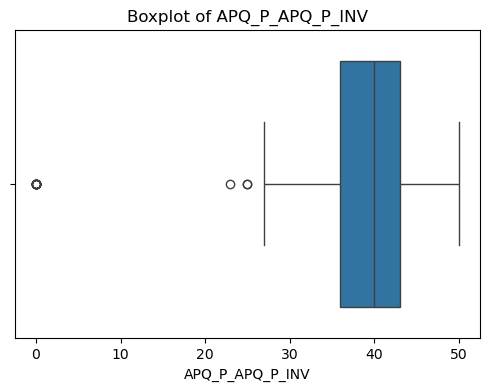

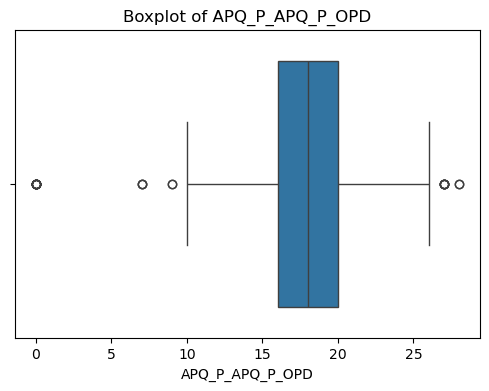

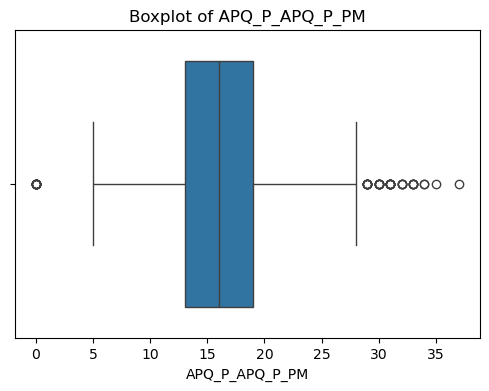

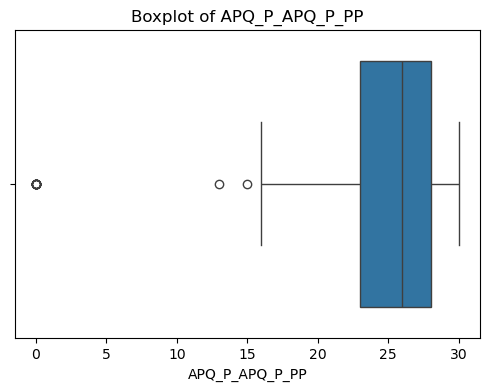

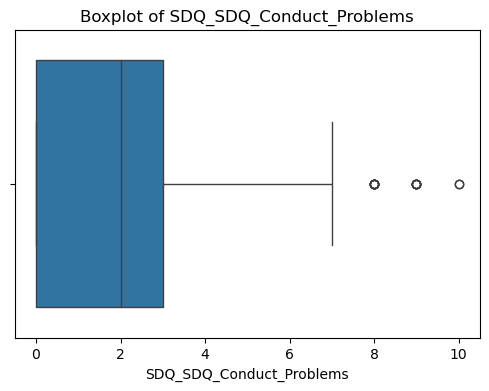

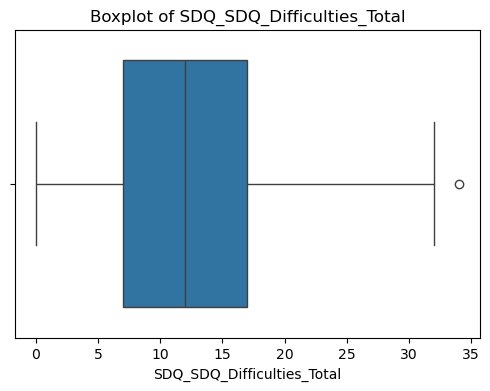

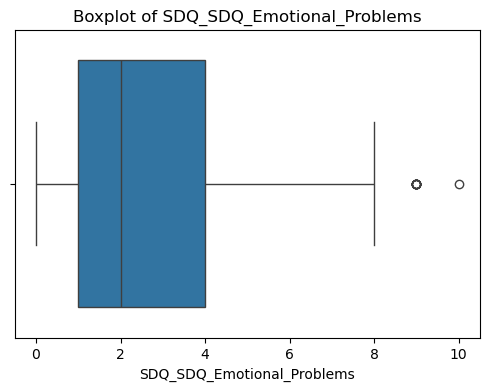

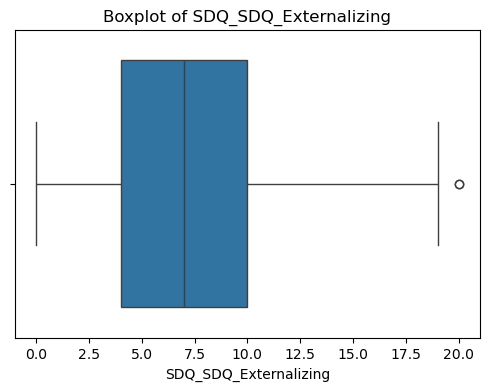

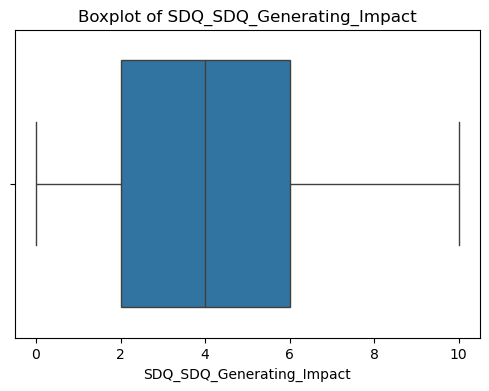

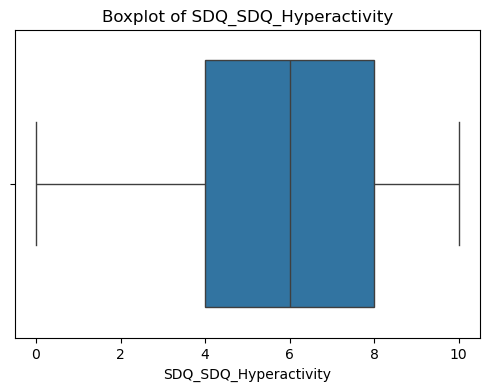

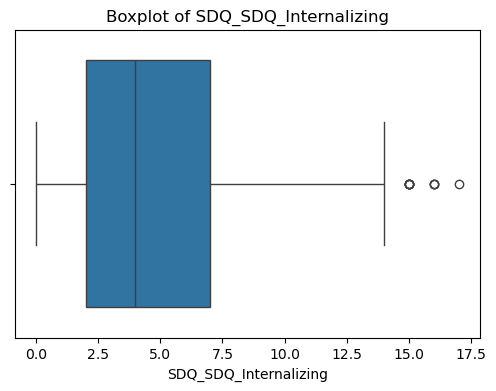

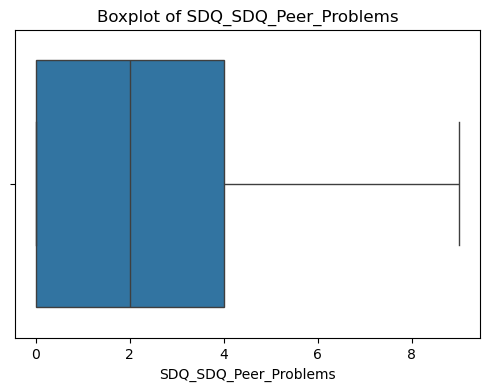

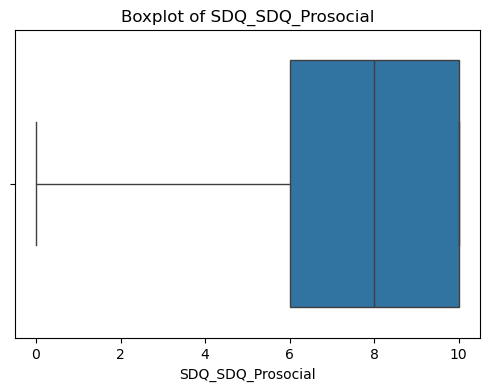

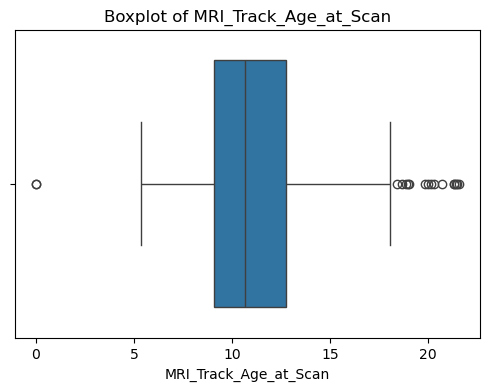

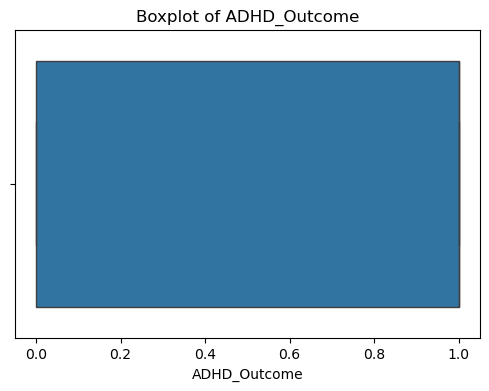

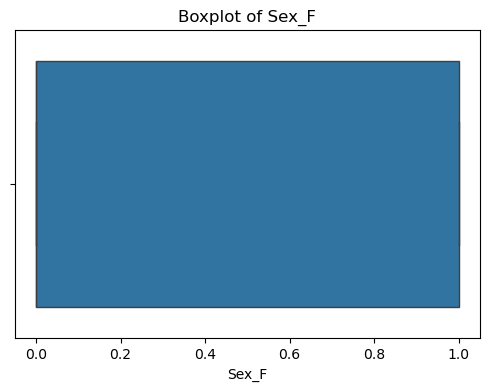

In [10]:
for col in df_quantitative_features.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_quantitative_features[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [12]:
Q1 = df_quantitative_features.quantile(0.25)
Q3 = df_quantitative_features.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_quantitative_features < (Q1 - 1.5 * IQR)) | (df_quantitative_features > (Q3 + 1.5 * IQR)))
print(outliers.sum())


EHQ_EHQ_Total                 110
ColorVision_CV_Score          244
APQ_P_APQ_P_CP                139
APQ_P_APQ_P_ID                 15
APQ_P_APQ_P_INV                15
APQ_P_APQ_P_OPD                25
APQ_P_APQ_P_PM                 49
APQ_P_APQ_P_PP                 14
SDQ_SDQ_Conduct_Problems       17
SDQ_SDQ_Difficulties_Total      1
SDQ_SDQ_Emotional_Problems     11
SDQ_SDQ_Externalizing           2
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing          10
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan          17
ADHD_Outcome                    0
Sex_F                           0
dtype: int64


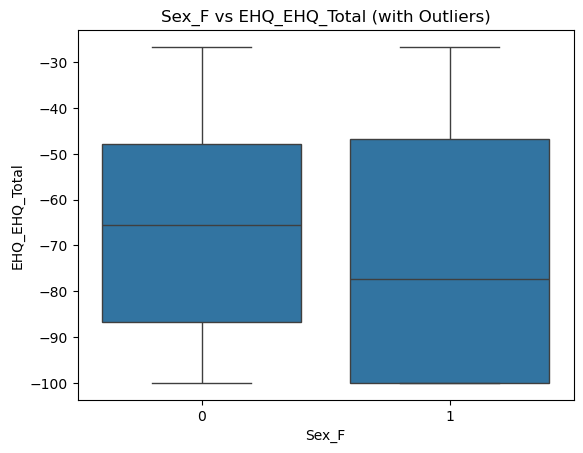

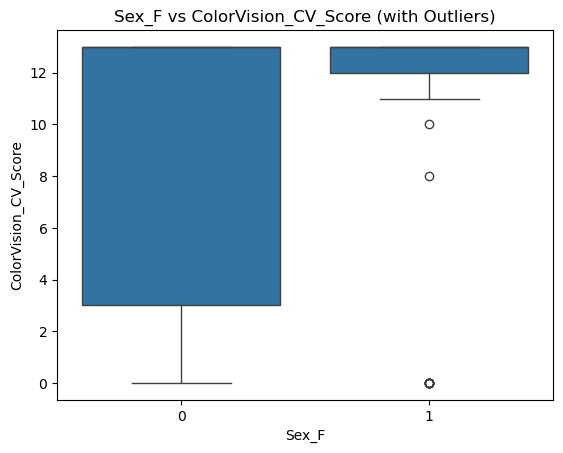

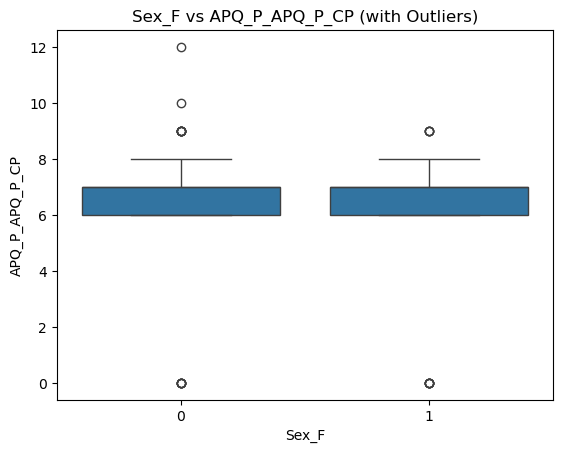

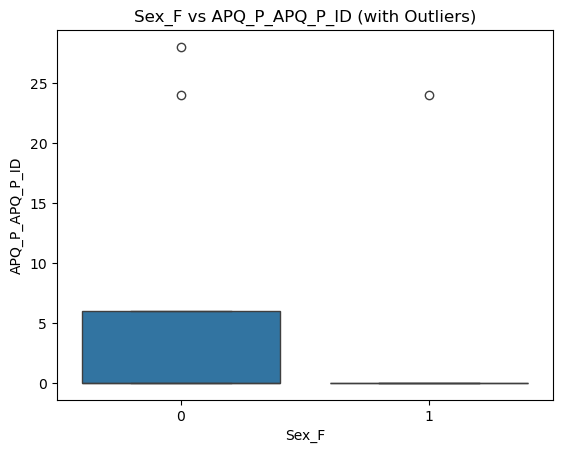

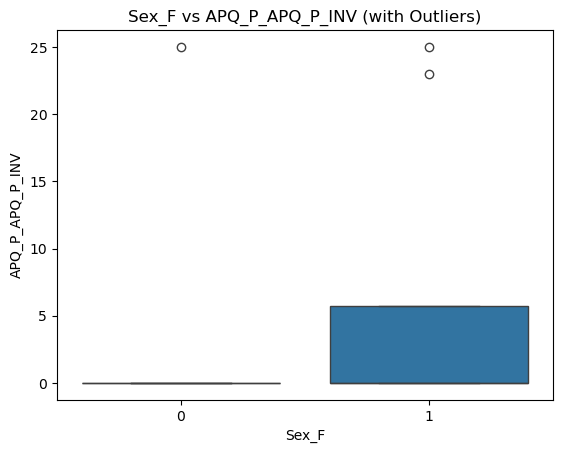

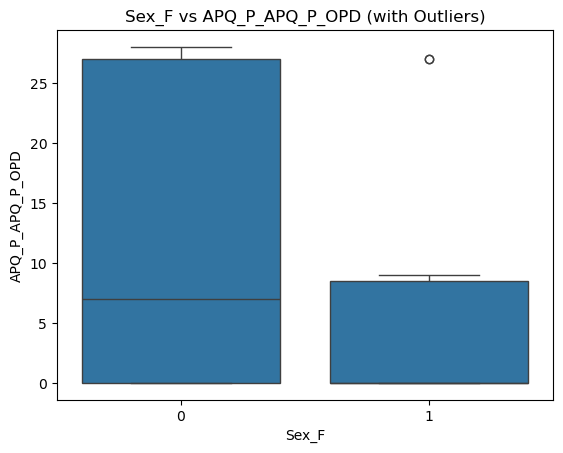

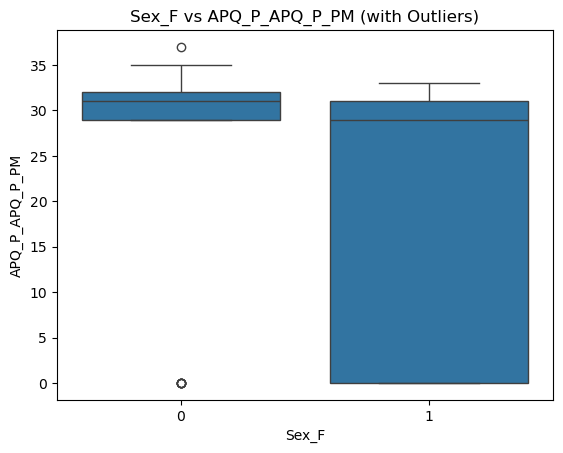

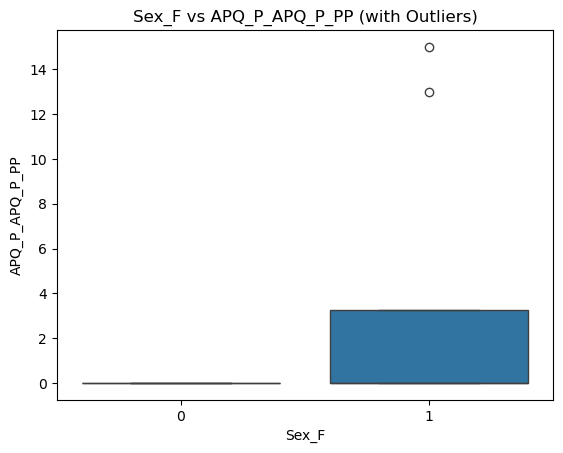

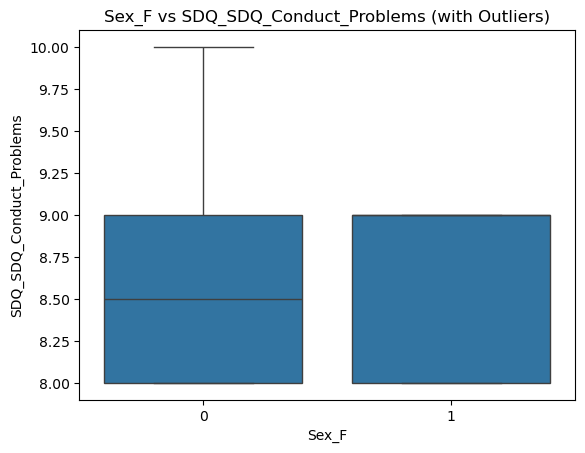

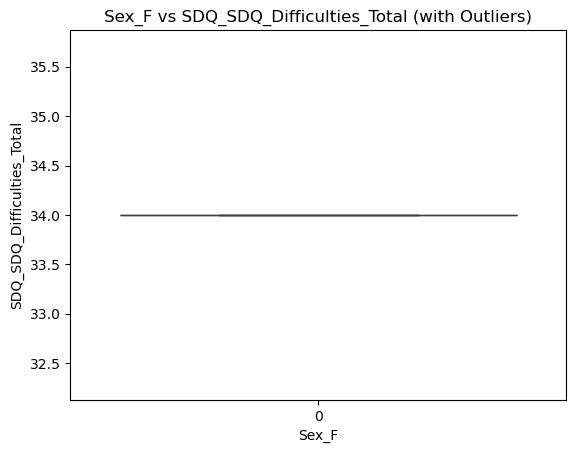

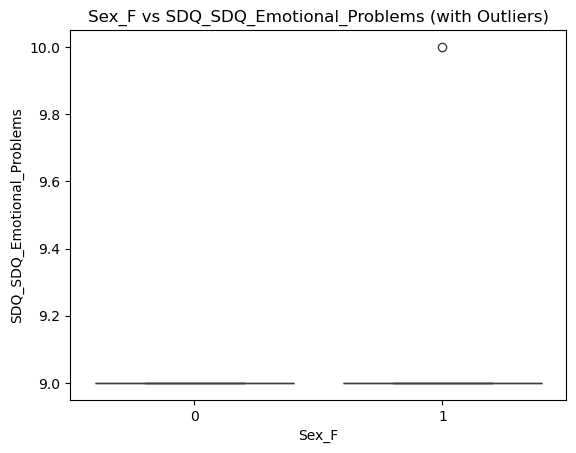

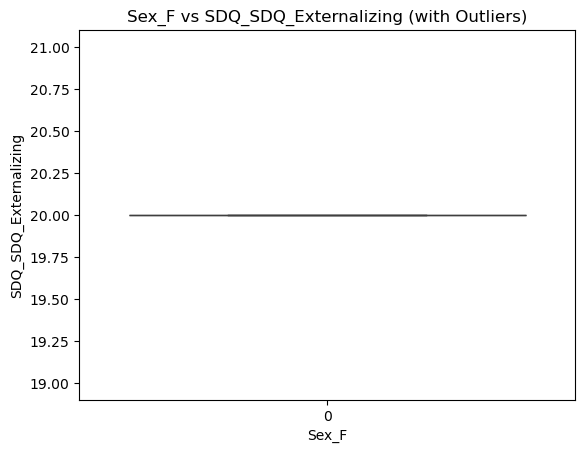

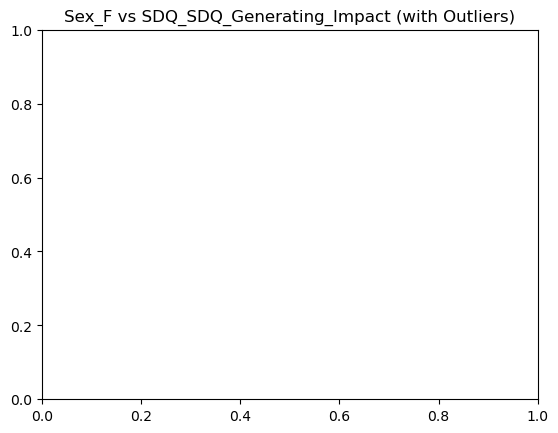

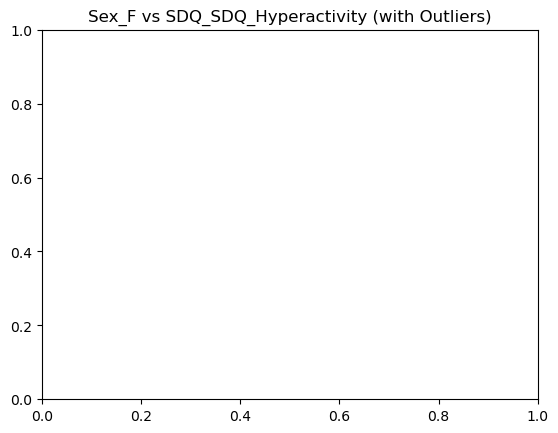

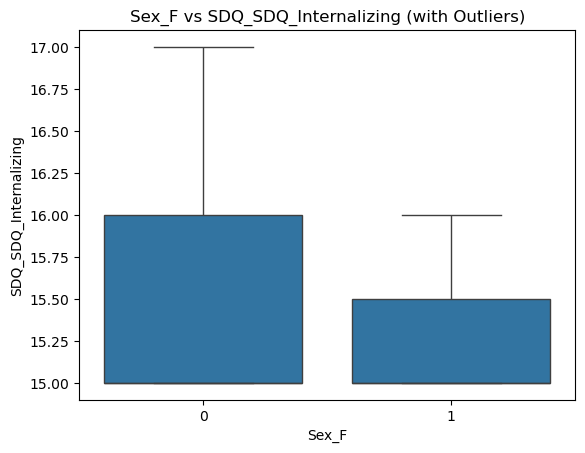

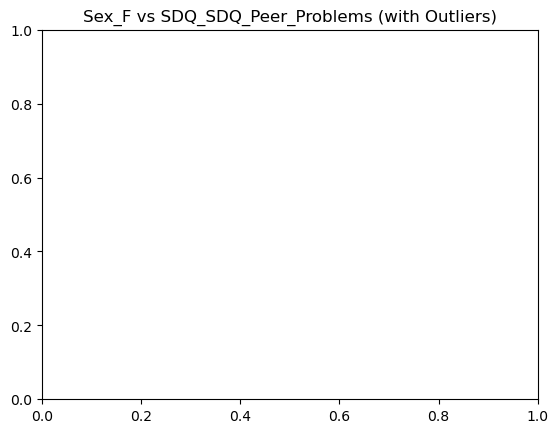

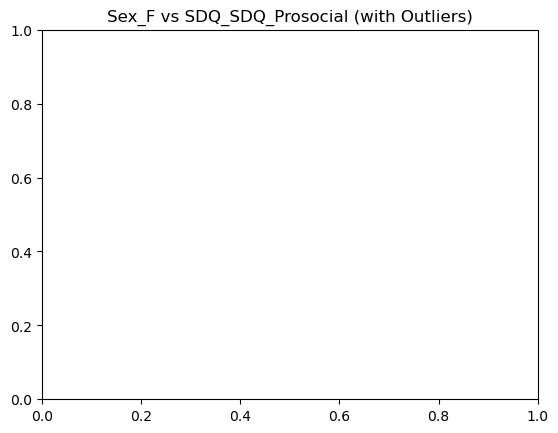

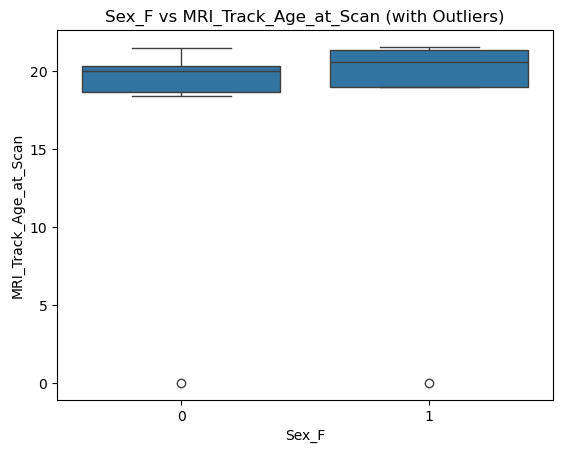

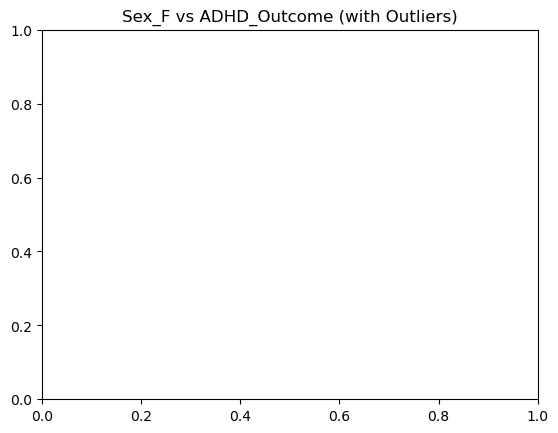

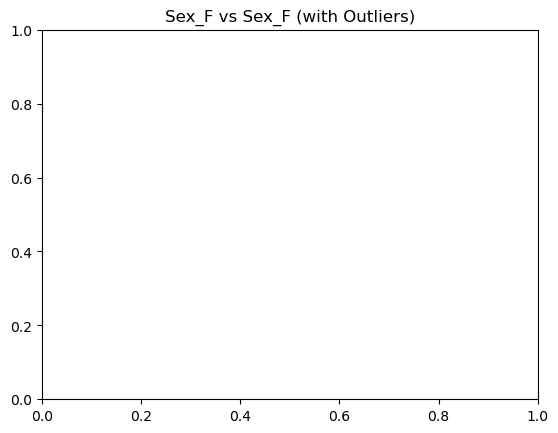

In [479]:
for col in df_quantitative_features.columns:
    outliers_in_feature = df_quantitative[outliers[col]]  
    sns.boxplot(x="Sex_F", y=col, data=outliers_in_feature)
    plt.title(f"Sex_F vs {col} (with Outliers)")
    plt.show()

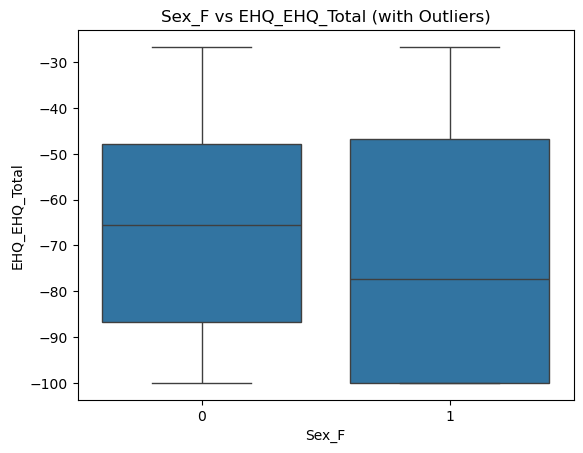

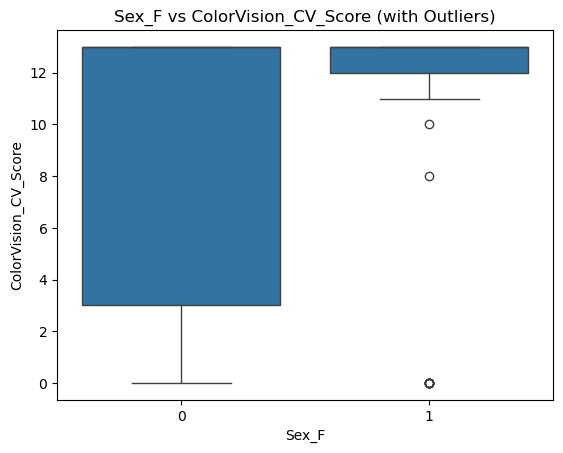

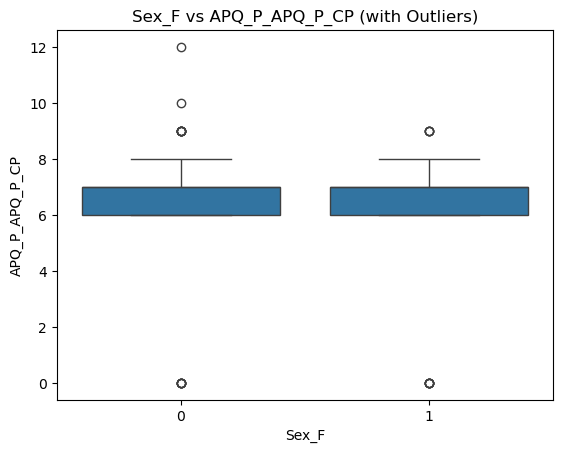

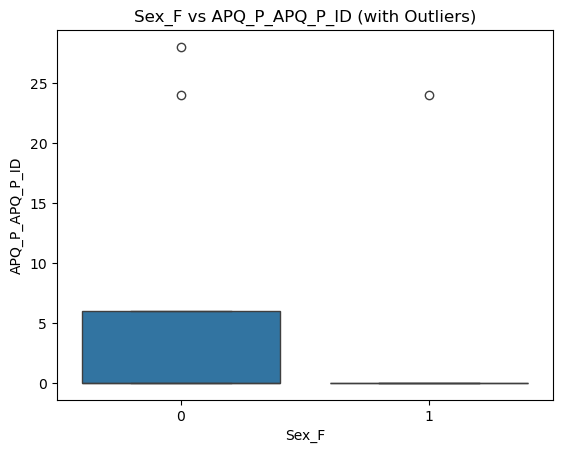

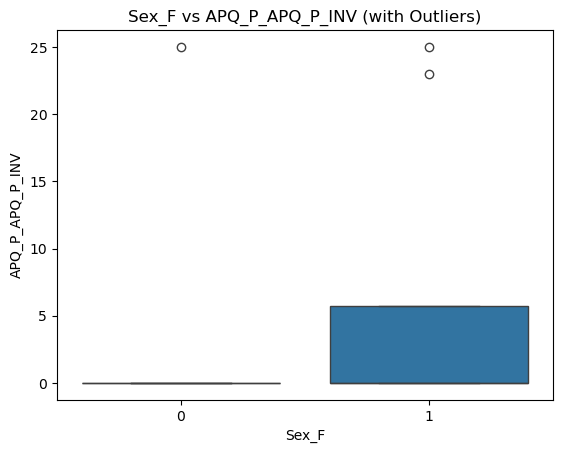

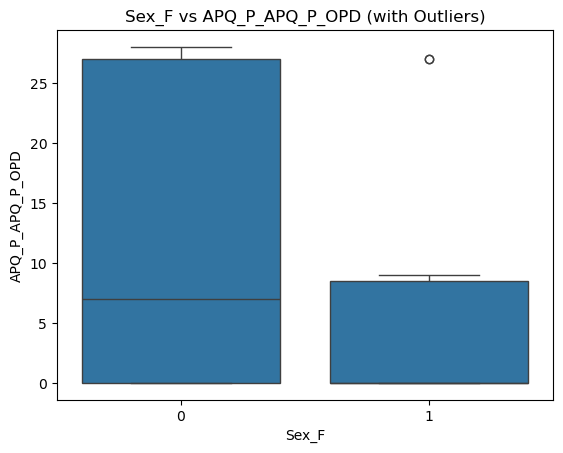

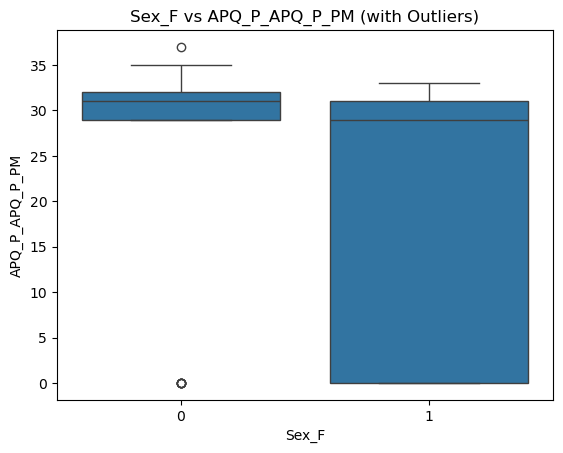

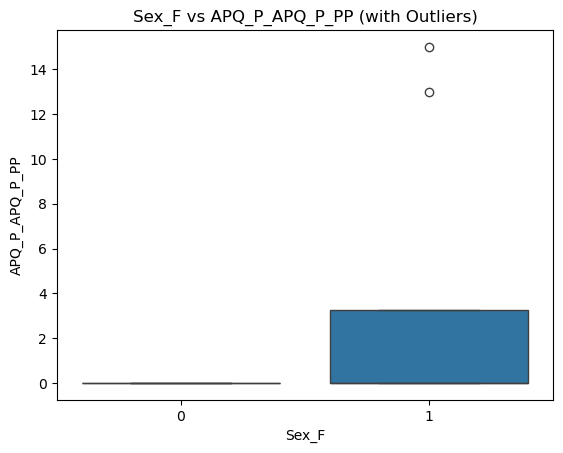

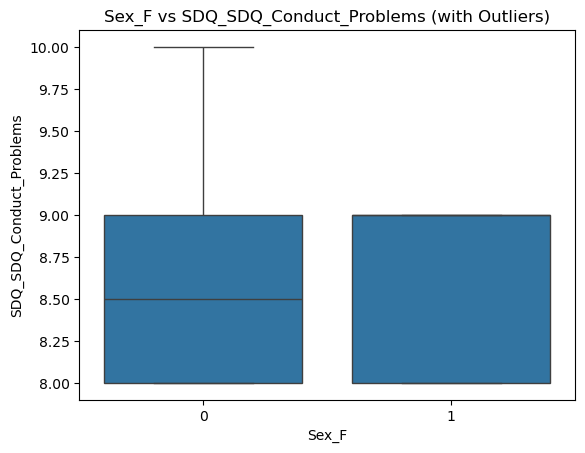

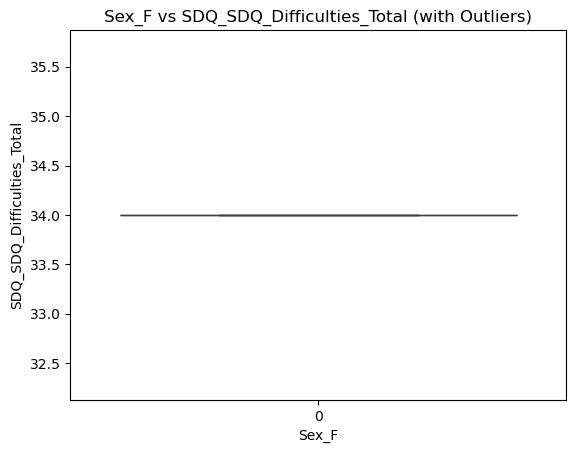

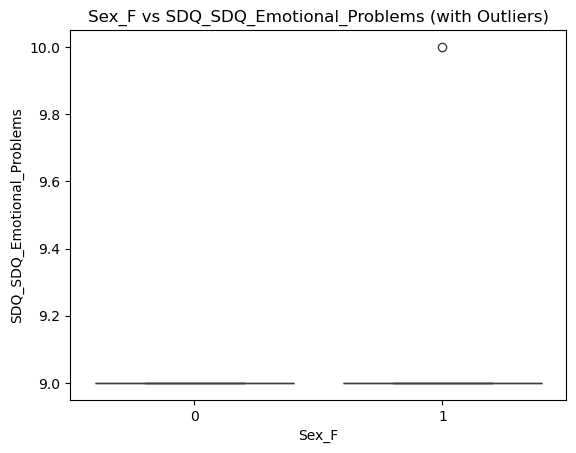

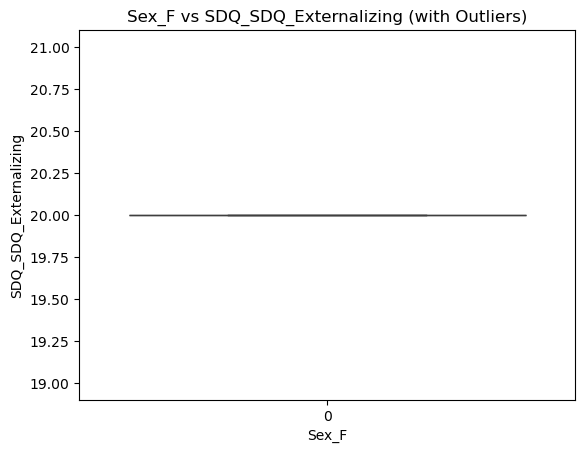

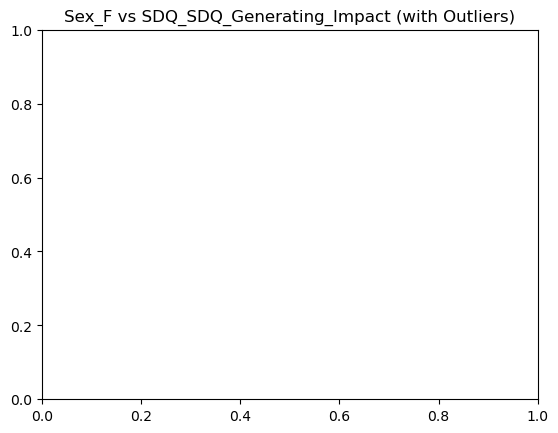

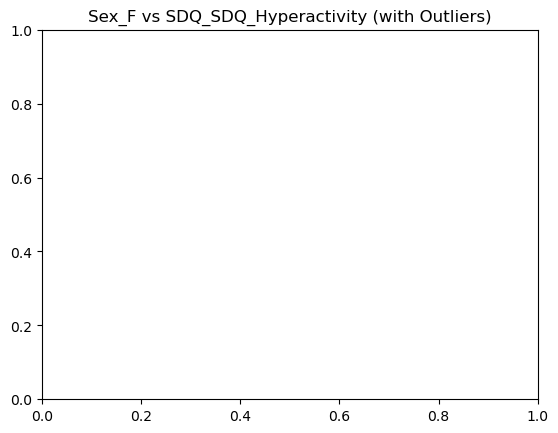

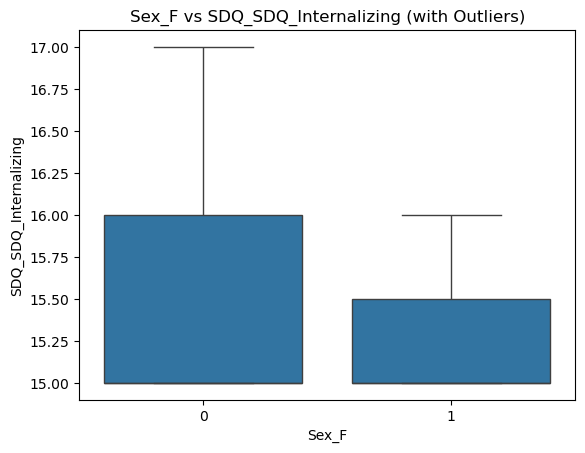

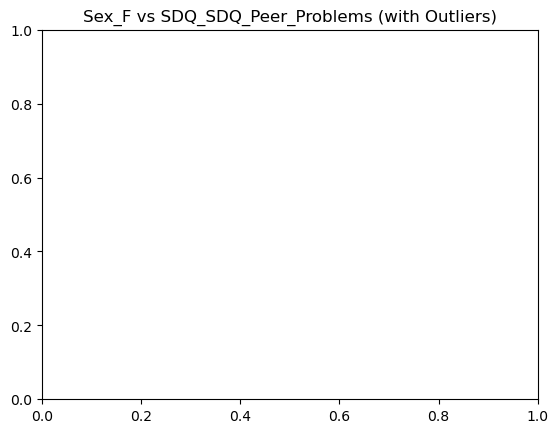

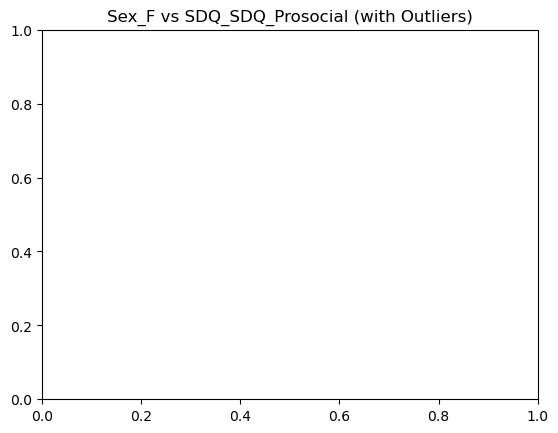

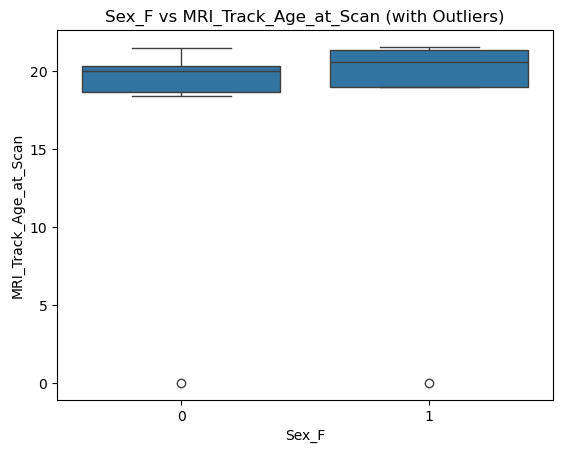

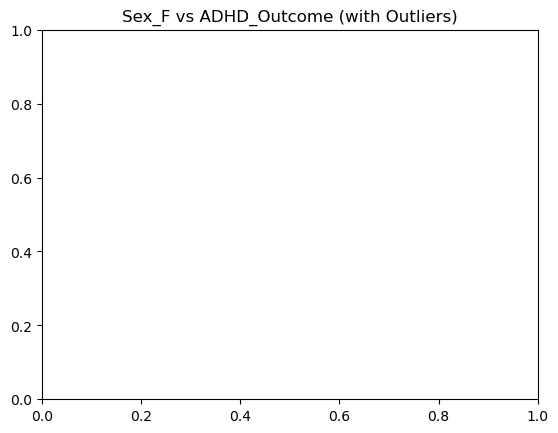

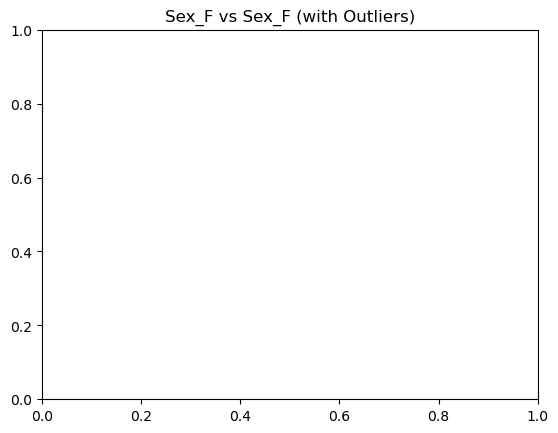

In [480]:
for col in df_quantitative_features.columns:
    outliers_in_feature = df_quantitative[outliers[col]]  
    sns.boxplot(x="Sex_F", y=col, data=outliers_in_feature)
    plt.title(f"Sex_F vs {col} (with Outliers)")
    plt.show()

In [481]:
df_quantitative_features["APQ_P_APQ_P_PP"].describe()

count    1213.000000
mean       25.246496
std         3.950529
min         0.000000
25%        23.000000
50%        26.000000
75%        28.000000
max        30.000000
Name: APQ_P_APQ_P_PP, dtype: float64

In [483]:
# Identify the exact values of the "outlier" points shown in the boxplot
feature_name = "APQ_P_APQ_P_PP"  # Replace with the actual feature

# Find the whisker limits in the boxplot
Q1 = df_quantitative_features[feature_name].quantile(0.25)
Q3 = df_quantitative_features[feature_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print outlier values
outliers_in_boxplot = df_quantitative_features[(df_quantitative_features[feature_name] < lower_bound) | 
                                               (df_quantitative_features[feature_name] > upper_bound)]

print(outliers_in_boxplot)


      EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
226           33.35                  13.0             0.0             0.0   
347         -100.00                   0.0             0.0             0.0   
352           60.00                  14.0             0.0             0.0   
360           77.80                  14.0             0.0             0.0   
384          -20.00                  14.0             0.0             0.0   
687          100.00                  14.0             3.0            10.0   
759           33.35                  14.0             0.0             0.0   
892          -16.68                  13.0             0.0             0.0   
947            0.00                   0.0             0.0             0.0   
1028         100.00                  14.0             0.0             0.0   
1072          70.00                  13.0             3.0            14.0   
1094          13.34                  14.0             0.0             0.0   

In [484]:
zero_counts = (df_quantitative_features == 0).sum()
print(zero_counts[zero_counts > 0])  


EHQ_EHQ_Total                  24
ColorVision_CV_Score           29
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems      348
SDQ_SDQ_Difficulties_Total     23
SDQ_SDQ_Emotional_Problems    299
SDQ_SDQ_Externalizing          44
SDQ_SDQ_Generating_Impact     204
SDQ_SDQ_Hyperactivity          60
SDQ_SDQ_Internalizing         141
SDQ_SDQ_Peer_Problems         320
SDQ_SDQ_Prosocial              10
MRI_Track_Age_at_Scan           2
ADHD_Outcome                  382
Sex_F                         797
dtype: int64


In [485]:
missing_features = ["APQ_P_APQ_P_ID", "APQ_P_APQ_P_INV", "APQ_P_APQ_P_OPD","APQ_P_APQ_P_PM", "APQ_P_APQ_P_PP"]
df_quantitative_features = df_quantitative_features[(df_quantitative_features[missing_features] != 0).all(axis=1)]

In [486]:
zero_counts = (df_quantitative_features == 0).sum()
print(zero_counts[zero_counts > 0])  


EHQ_EHQ_Total                  23
ColorVision_CV_Score           27
SDQ_SDQ_Conduct_Problems      345
SDQ_SDQ_Difficulties_Total     23
SDQ_SDQ_Emotional_Problems    292
SDQ_SDQ_Externalizing          43
SDQ_SDQ_Generating_Impact     200
SDQ_SDQ_Hyperactivity          59
SDQ_SDQ_Internalizing         139
SDQ_SDQ_Peer_Problems         318
SDQ_SDQ_Prosocial              10
MRI_Track_Age_at_Scan           2
ADHD_Outcome                  376
Sex_F                         791
dtype: int64


In [487]:
zero_distribution_cv = df_quantitative_features[df_quantitative_features["ColorVision_CV_Score"] == 0]["Sex_F"].value_counts()
print(f"Distribution of `0.0` values in ColorVision_CV_Score by Sex_F:")
print(zero_distribution_cv)


Distribution of `0.0` values in ColorVision_CV_Score by Sex_F:
Sex_F
0    20
1     7
Name: count, dtype: int64


In [488]:
# Check summary statistics for ColorVision_CV_Score
print(df_quantitative_features["ColorVision_CV_Score"].describe())


count    1201.000000
mean       13.181515
std         2.741415
min         0.000000
25%        14.000000
50%        14.000000
75%        14.000000
max        14.000000
Name: ColorVision_CV_Score, dtype: float64


In [489]:
missing_features = ["ColorVision_CV_Score"]
df_quantitative_features = df_quantitative_features[(df_quantitative_features[missing_features] != 0).all(axis=1)]

In [492]:
# Compute the correlation matrix for all quantitative features
corr_matrix = df_quantitative_features.corr()

# Get correlation of all features with Sex_F, sorted from highest to lowest
corr_with_sex = corr_matrix["Sex_F"].sort_values(ascending=False)
print(corr_with_sex)


Sex_F                         1.000000
SDQ_SDQ_Prosocial             0.111132
ColorVision_CV_Score          0.106630
SDQ_SDQ_Emotional_Problems    0.099945
SDQ_SDQ_Internalizing         0.049795
EHQ_EHQ_Total                 0.009865
APQ_P_APQ_P_PM               -0.014914
SDQ_SDQ_Peer_Problems        -0.019374
SDQ_SDQ_Generating_Impact    -0.024602
APQ_P_APQ_P_ID               -0.025225
MRI_Track_Age_at_Scan        -0.030166
APQ_P_APQ_P_CP               -0.038044
SDQ_SDQ_Conduct_Problems     -0.049613
SDQ_SDQ_Difficulties_Total   -0.051961
APQ_P_APQ_P_INV              -0.059031
APQ_P_APQ_P_OPD              -0.065685
APQ_P_APQ_P_PP               -0.072842
SDQ_SDQ_Externalizing        -0.124446
ADHD_Outcome                 -0.137385
SDQ_SDQ_Hyperactivity        -0.147687
Name: Sex_F, dtype: float64


In [493]:
# Compute covariance between all features
cov_matrix = df_quantitative_features.cov()

# Print the covariance matrix
print(cov_matrix["Sex_F"])  # Look at the covariance of Sex_F with all features


EHQ_EHQ_Total                 0.233500
ColorVision_CV_Score          0.096060
APQ_P_APQ_P_CP               -0.024191
APQ_P_APQ_P_ID               -0.043016
APQ_P_APQ_P_INV              -0.136342
APQ_P_APQ_P_OPD              -0.104160
APQ_P_APQ_P_PM               -0.036448
APQ_P_APQ_P_PP               -0.106011
SDQ_SDQ_Conduct_Problems     -0.047816
SDQ_SDQ_Difficulties_Total   -0.162752
SDQ_SDQ_Emotional_Problems    0.102853
SDQ_SDQ_Externalizing        -0.246306
SDQ_SDQ_Generating_Impact    -0.032954
SDQ_SDQ_Hyperactivity        -0.198489
SDQ_SDQ_Internalizing         0.083554
SDQ_SDQ_Peer_Problems        -0.019299
SDQ_SDQ_Prosocial             0.116129
MRI_Track_Age_at_Scan        -0.040757
ADHD_Outcome                 -0.030173
Sex_F                         0.225628
Name: Sex_F, dtype: float64


In [494]:
# Compute Pearson's correlation between all features
pearson_corr = df_quantitative_features.corr(method='pearson')

# Print Pearson correlation for all features with Sex_F
print(pearson_corr["Sex_F"].sort_values(ascending=False))


Sex_F                         1.000000
SDQ_SDQ_Prosocial             0.111132
ColorVision_CV_Score          0.106630
SDQ_SDQ_Emotional_Problems    0.099945
SDQ_SDQ_Internalizing         0.049795
EHQ_EHQ_Total                 0.009865
APQ_P_APQ_P_PM               -0.014914
SDQ_SDQ_Peer_Problems        -0.019374
SDQ_SDQ_Generating_Impact    -0.024602
APQ_P_APQ_P_ID               -0.025225
MRI_Track_Age_at_Scan        -0.030166
APQ_P_APQ_P_CP               -0.038044
SDQ_SDQ_Conduct_Problems     -0.049613
SDQ_SDQ_Difficulties_Total   -0.051961
APQ_P_APQ_P_INV              -0.059031
APQ_P_APQ_P_OPD              -0.065685
APQ_P_APQ_P_PP               -0.072842
SDQ_SDQ_Externalizing        -0.124446
ADHD_Outcome                 -0.137385
SDQ_SDQ_Hyperactivity        -0.147687
Name: Sex_F, dtype: float64


In [495]:
# Compute Spearman's rank correlation between all features
spearman_corr = df_quantitative_features.corr(method='spearman')

# Print Spearman correlation for all features with Sex_F
print(spearman_corr["Sex_F"].sort_values(ascending=False))


Sex_F                         1.000000
SDQ_SDQ_Prosocial             0.118849
SDQ_SDQ_Emotional_Problems    0.092332
SDQ_SDQ_Internalizing         0.039528
ColorVision_CV_Score          0.023642
APQ_P_APQ_P_PM               -0.004220
EHQ_EHQ_Total                -0.021839
SDQ_SDQ_Generating_Impact    -0.022269
SDQ_SDQ_Peer_Problems        -0.025734
APQ_P_APQ_P_CP               -0.030461
APQ_P_APQ_P_ID               -0.034638
MRI_Track_Age_at_Scan        -0.034686
APQ_P_APQ_P_INV              -0.053399
SDQ_SDQ_Difficulties_Total   -0.056941
SDQ_SDQ_Conduct_Problems     -0.057698
APQ_P_APQ_P_PP               -0.059644
APQ_P_APQ_P_OPD              -0.075146
SDQ_SDQ_Externalizing        -0.122693
ADHD_Outcome                 -0.137385
SDQ_SDQ_Hyperactivity        -0.143491
Name: Sex_F, dtype: float64


Sex_F
0    771
1    403
Name: count, dtype: int64


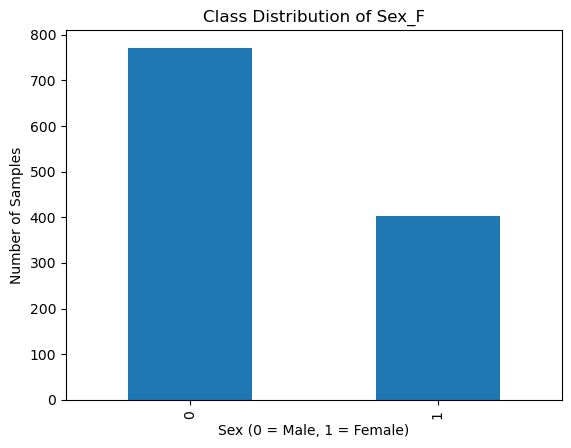

In [496]:
# Check the distribution of Sex_F (target variable)
print(df_quantitative_features["Sex_F"].value_counts())

# Visualize the distribution with a bar plot
import matplotlib.pyplot as plt
df_quantitative_features["Sex_F"].value_counts().plot(kind='bar')
plt.title("Class Distribution of Sex_F")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Number of Samples")
plt.show()


## Categorical Data

In [497]:
df_categorical= pd.read_pickle("ProcessedData/proccessed_categorical_data.pkl")

In [498]:
df_categorical_features=df_categorical.drop(columns=["participant_id"])

In [518]:
df_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Basic_Demos_Enroll_Year             1213 non-null   int64
 1   PreInt_Demos_Fam_Child_Race         1213 non-null   int64
 2   Barratt_Barratt_P1_Edu              1213 non-null   int64
 3   Barratt_Barratt_P1_Occ              1213 non-null   int64
 4   Barratt_Barratt_P2_Edu              1213 non-null   int64
 5   Barratt_Barratt_P2_Occ              1213 non-null   int64
 6   Basic_Demos_Study_Site_1            1213 non-null   int32
 7   Basic_Demos_Study_Site_2            1213 non-null   int32
 8   Basic_Demos_Study_Site_3            1213 non-null   int32
 9   Basic_Demos_Study_Site_4            1213 non-null   int32
 10  PreInt_Demos_Fam_Child_Ethnicity_0  1213 non-null   int32
 11  PreInt_Demos_Fam_Child_Ethnicity_1  1213 non-null   int32
 12  PreInt

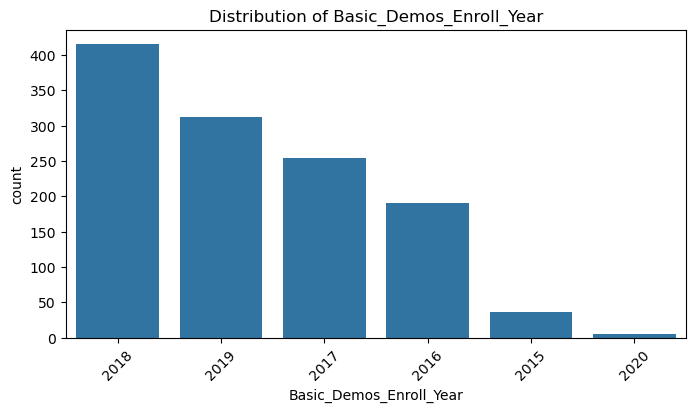

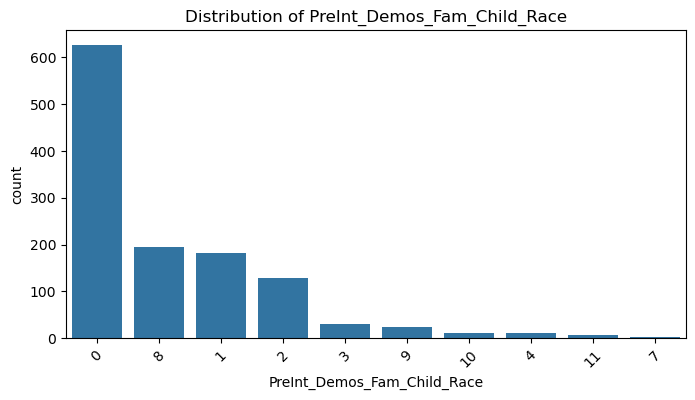

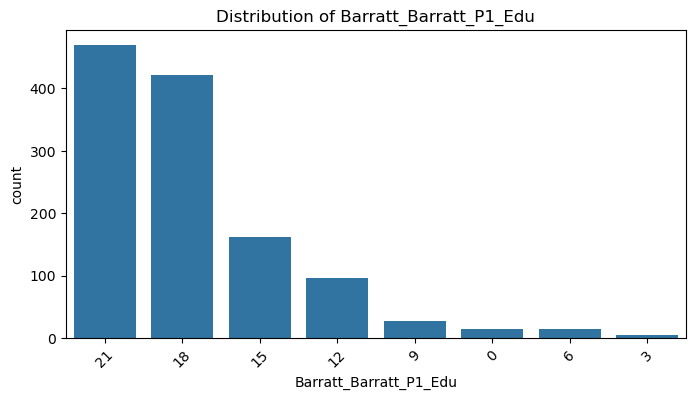

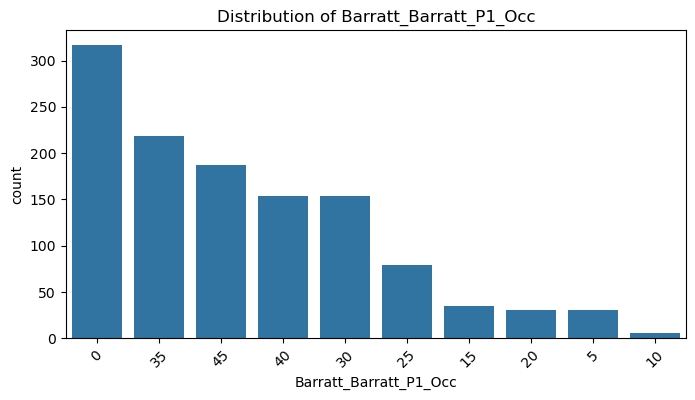

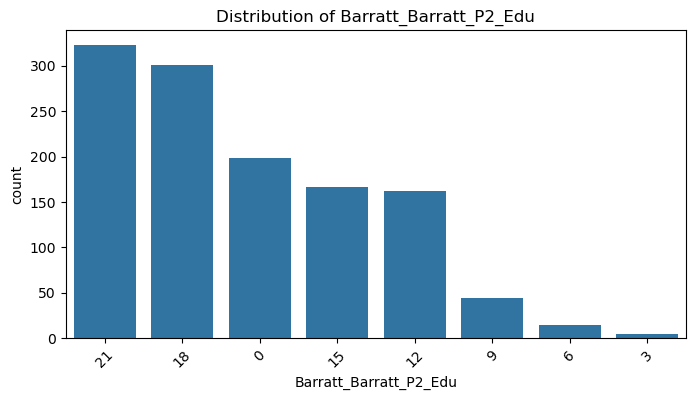

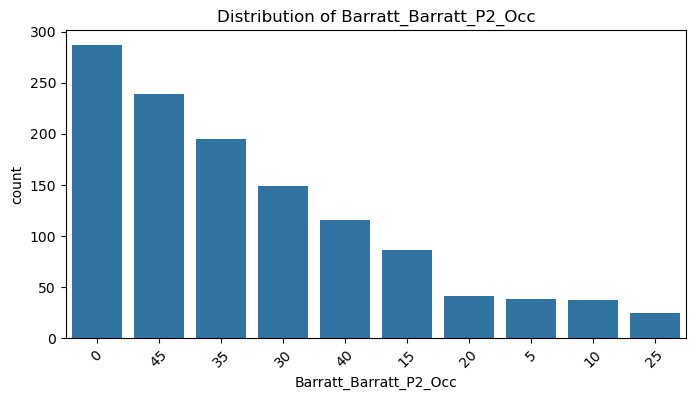

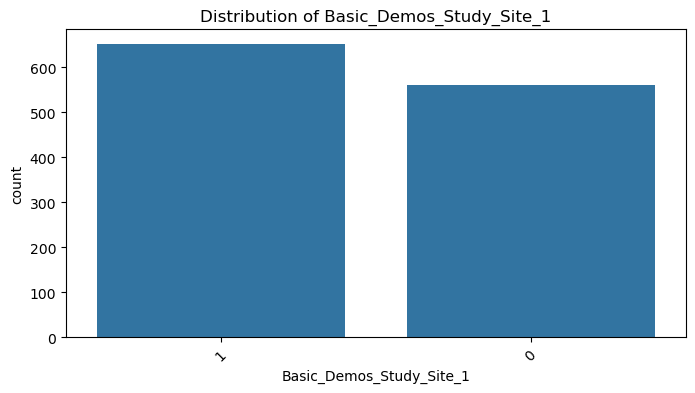

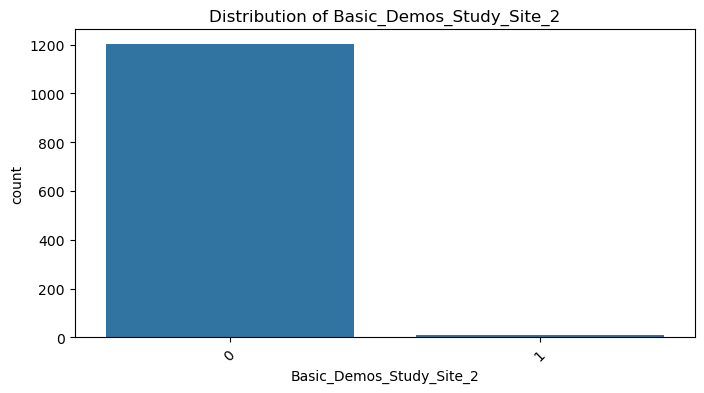

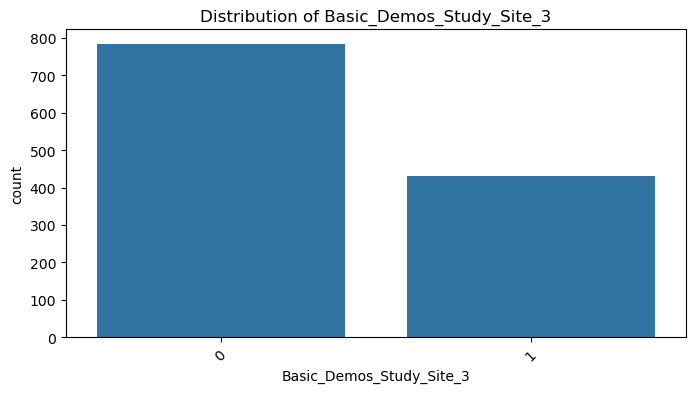

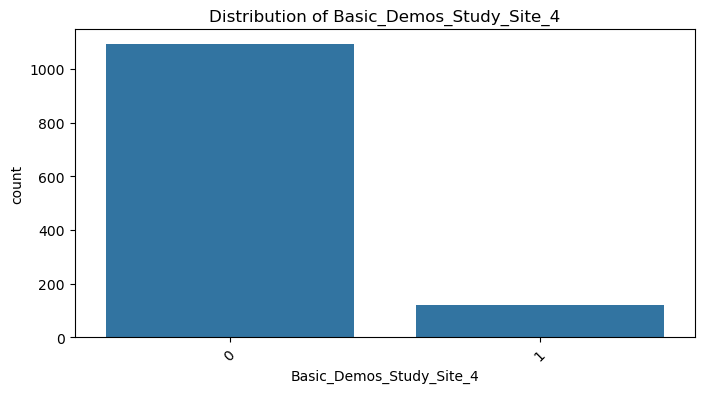

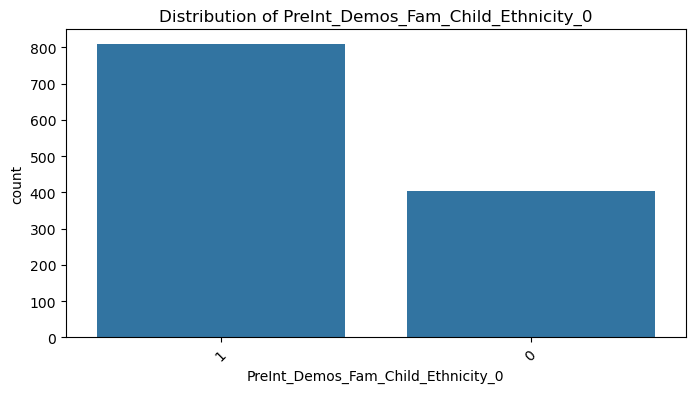

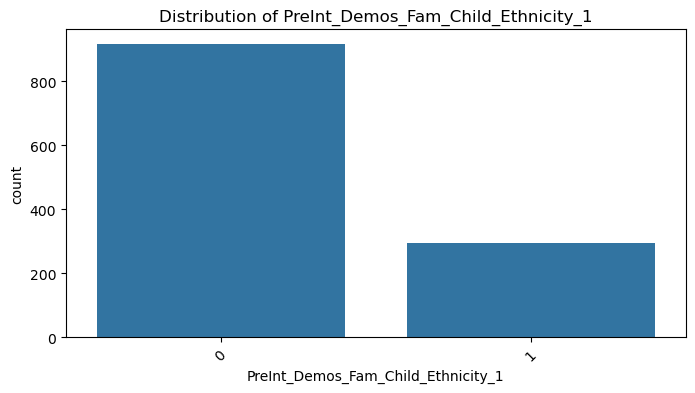

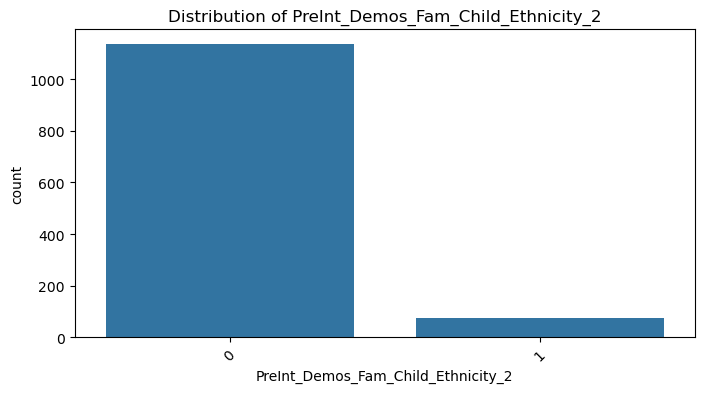

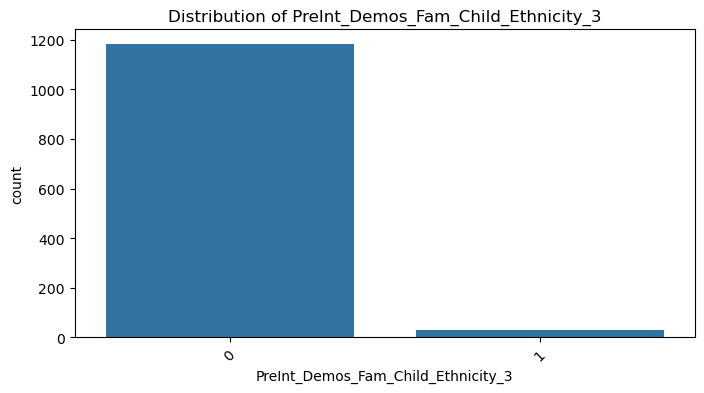

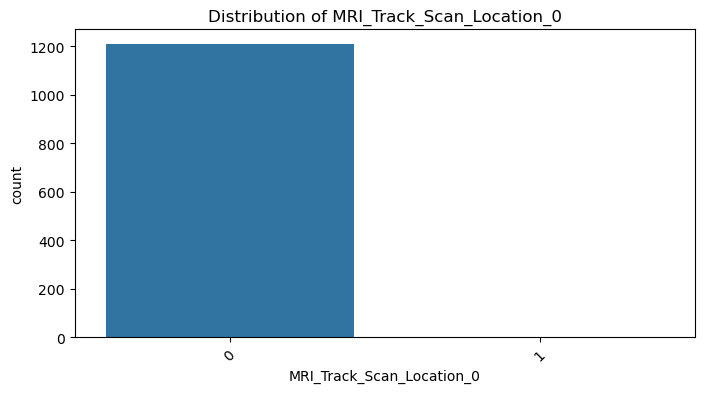

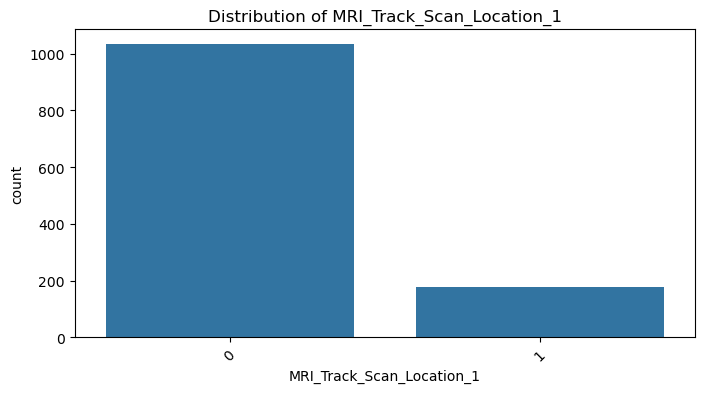

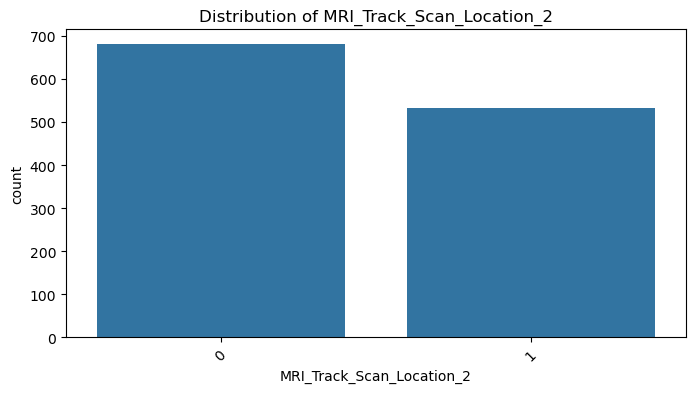

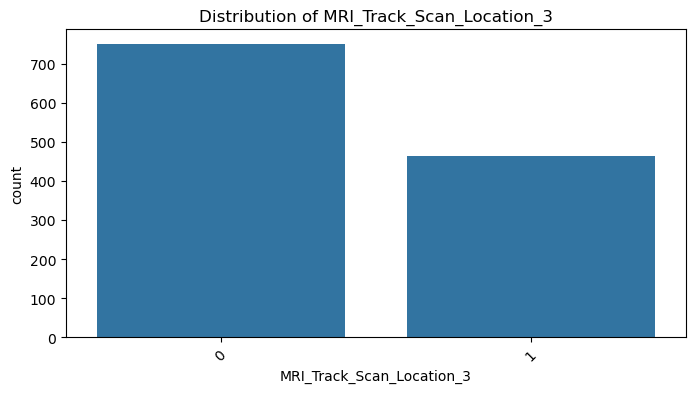

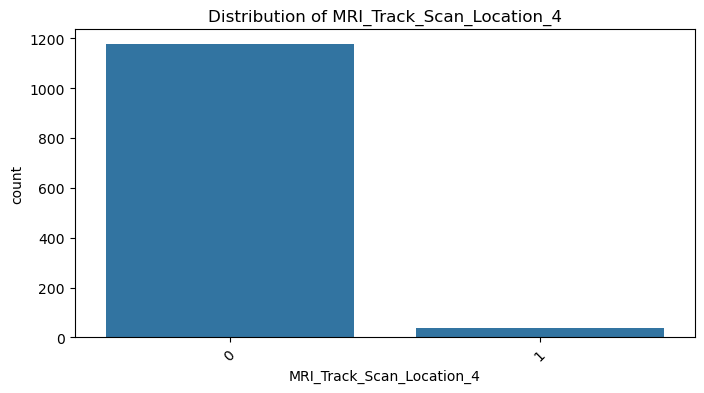

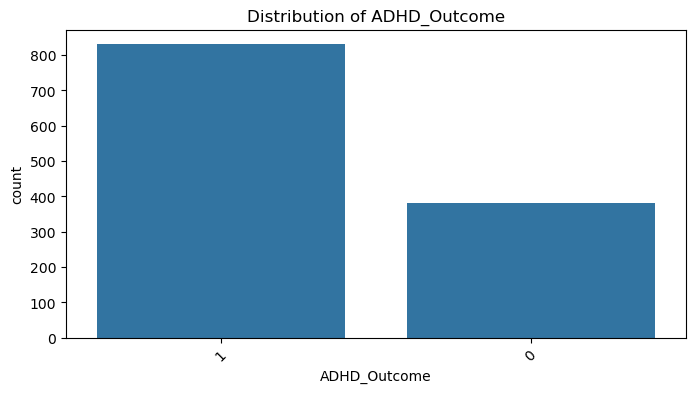

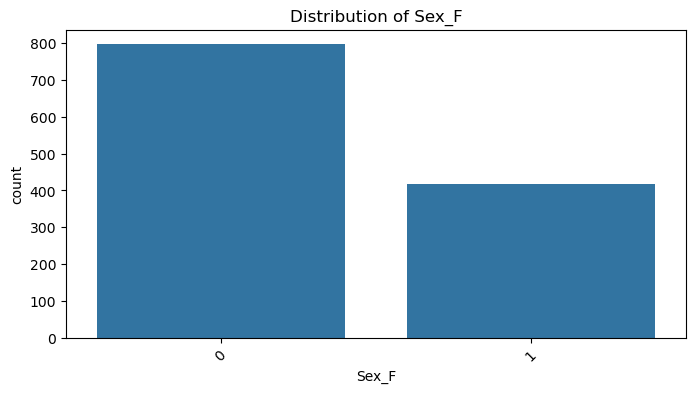

In [520]:
for col in df_categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_categorical_features, x=col, order=df_categorical_features[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()



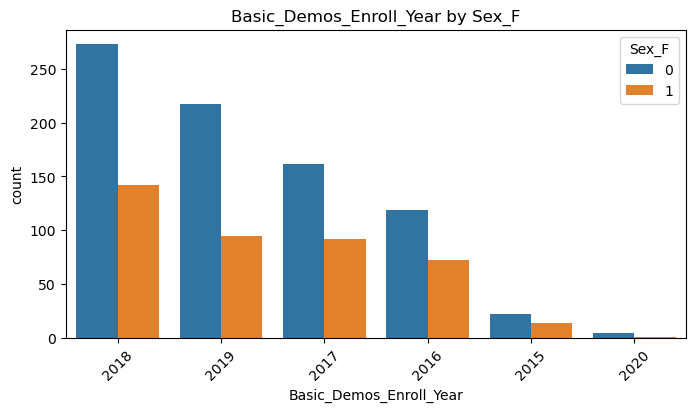

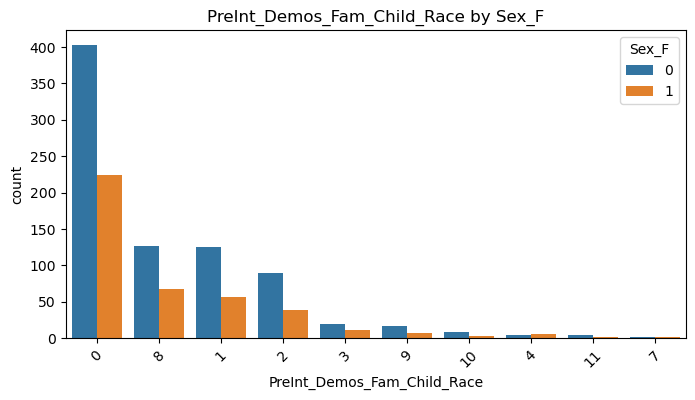

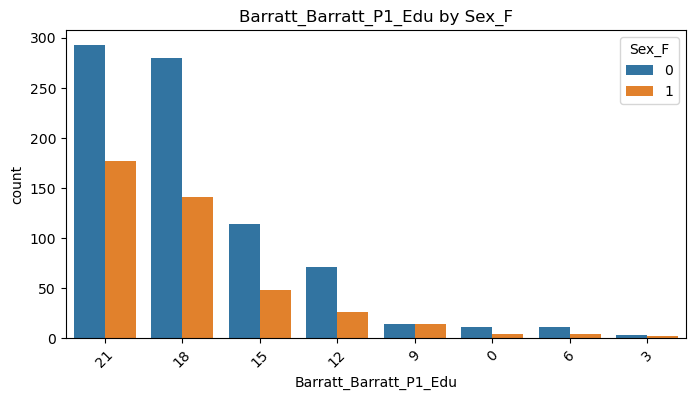

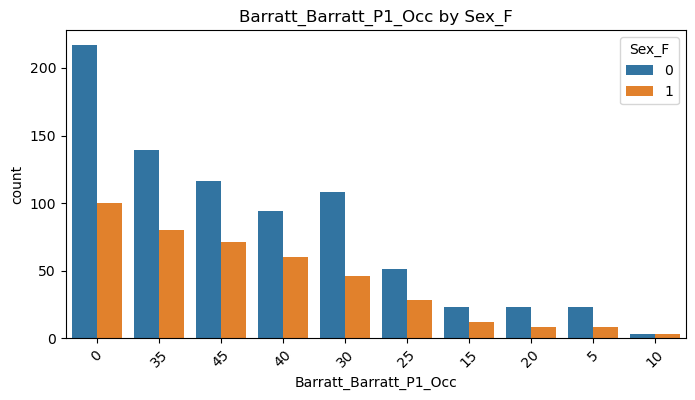

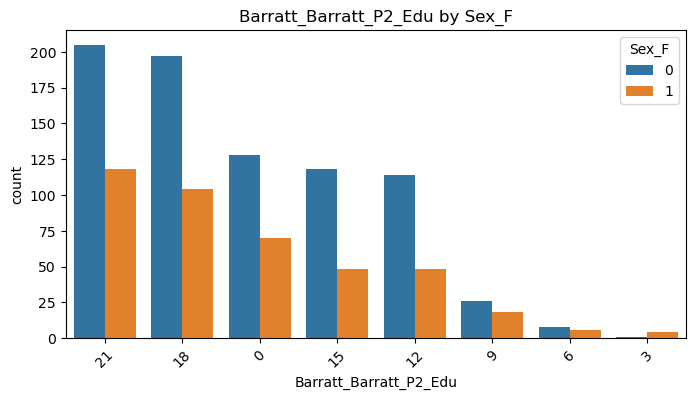

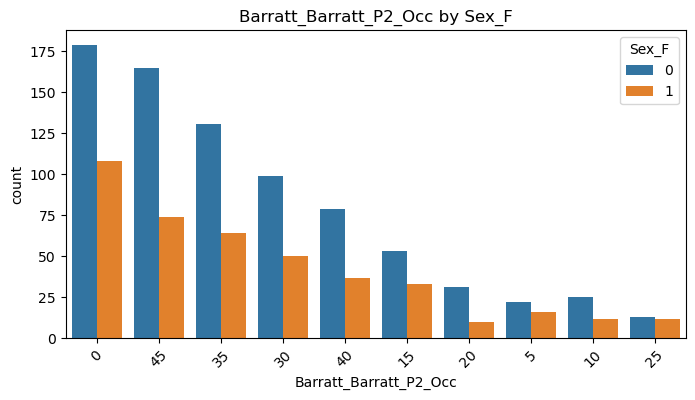

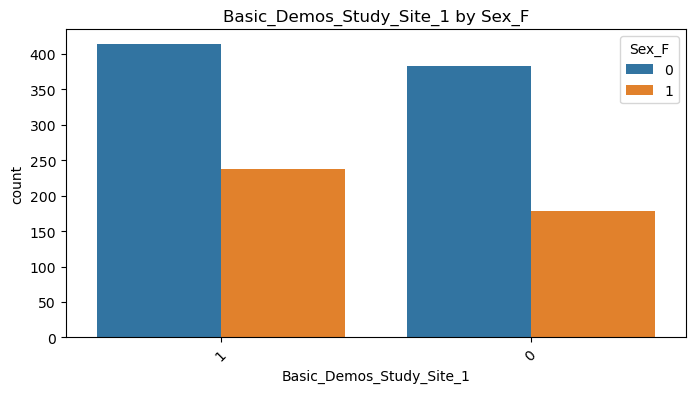

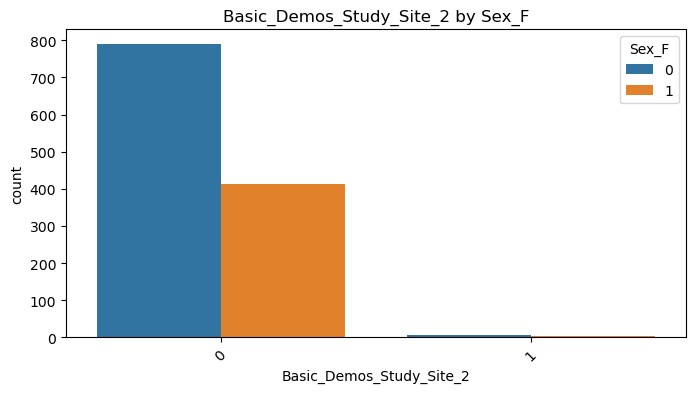

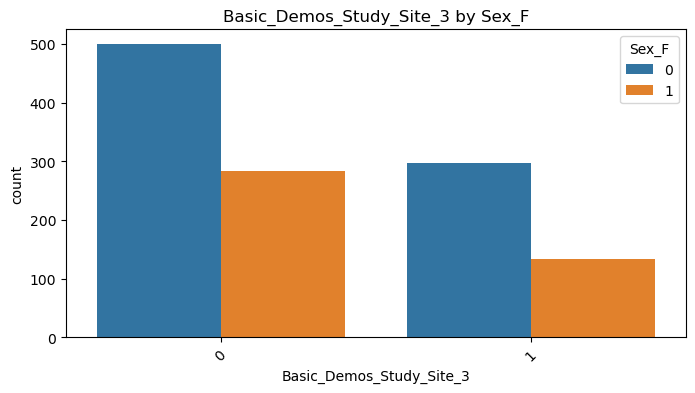

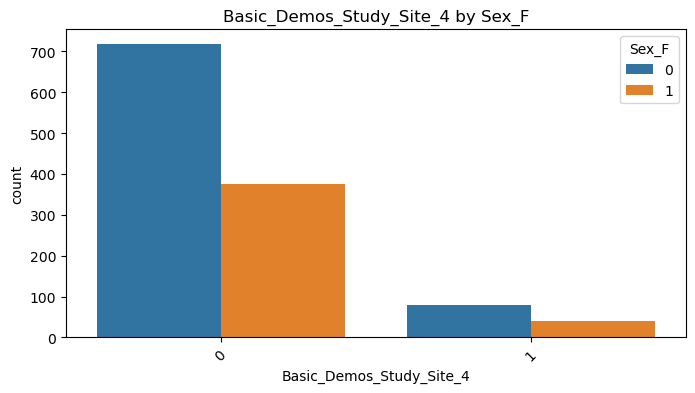

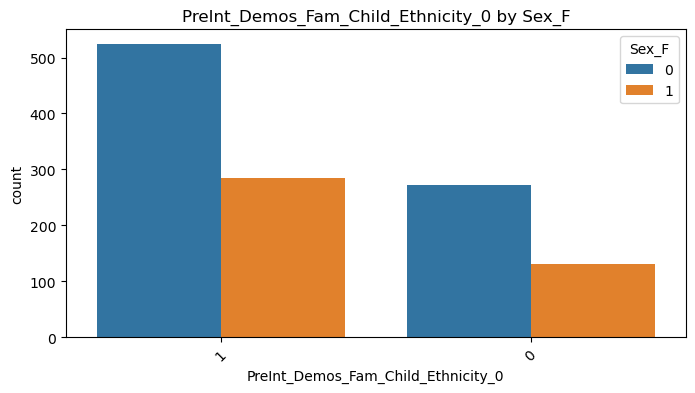

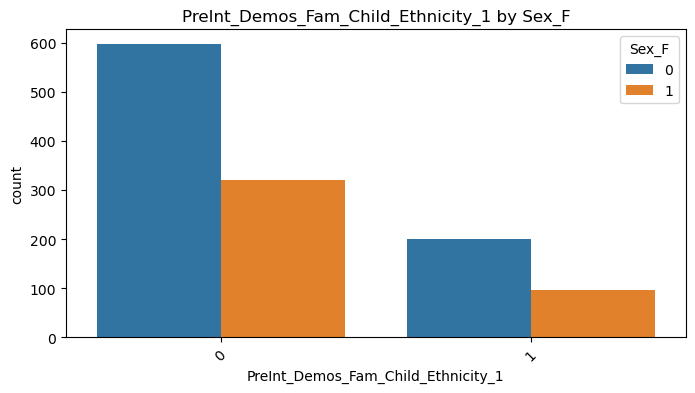

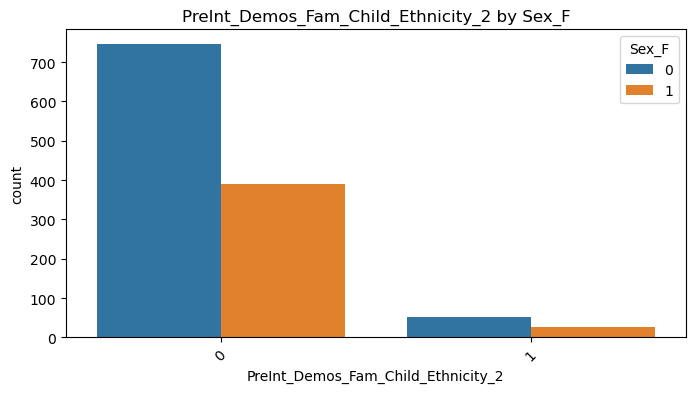

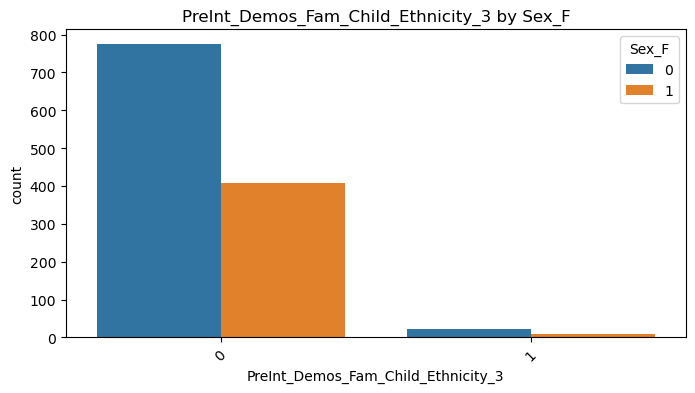

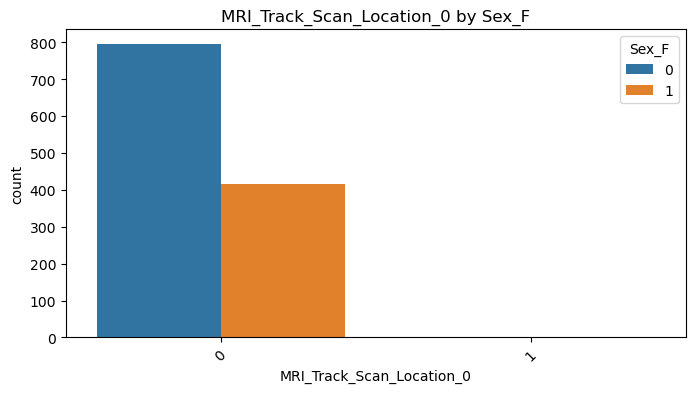

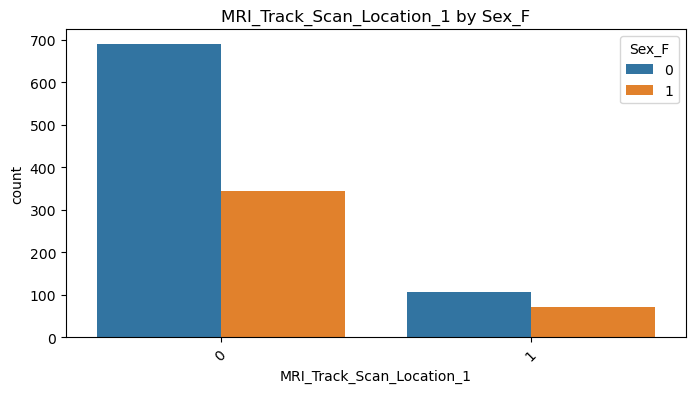

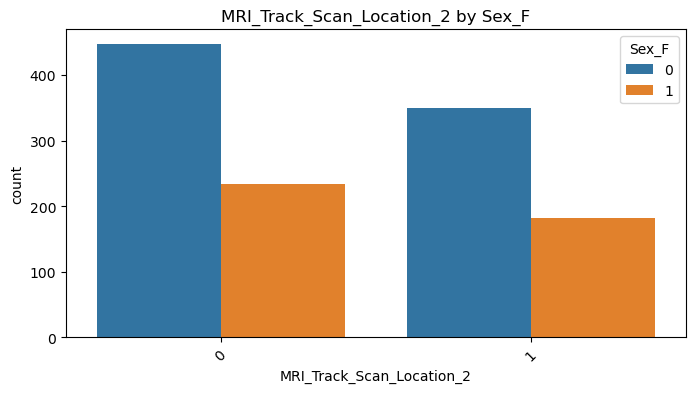

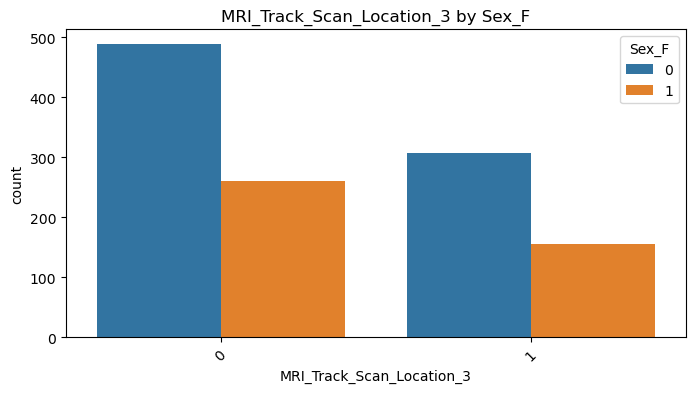

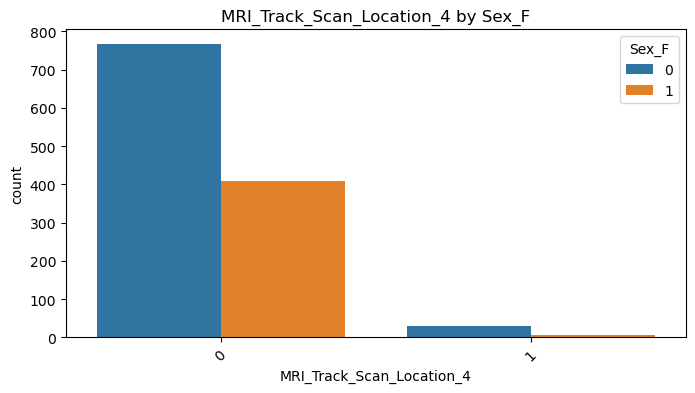

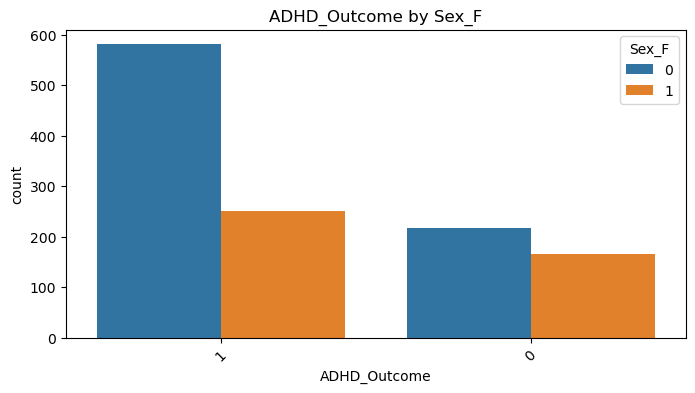

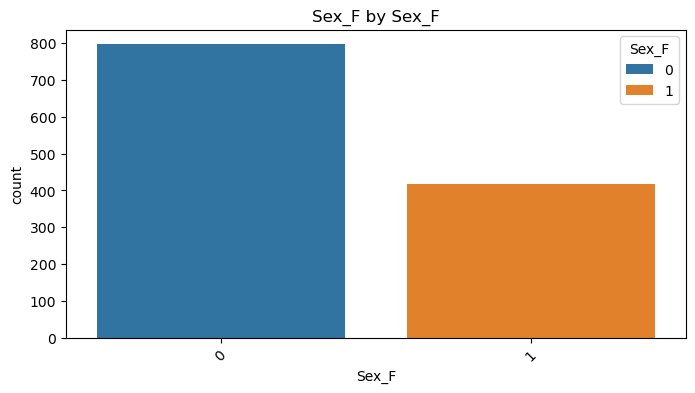

In [524]:
for col in df_categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_categorical_features, x=col, hue="Sex_F", order=df_categorical_features[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} by Sex_F")
    plt.show()


In [528]:
# Compute the correlation matrix
corr_matrix = df_categorical_features.corr()

# Get correlation of all features with Sex_F, sorted from highest to lowest
corr_with_sex = corr_matrix["Sex_F"].sort_values(ascending=False)
print(corr_with_sex)


Sex_F                                 1.000000
Barratt_Barratt_P1_Occ                0.054042
MRI_Track_Scan_Location_1             0.051962
Basic_Demos_Study_Site_1              0.050143
Barratt_Barratt_P1_Edu                0.045200
PreInt_Demos_Fam_Child_Ethnicity_0    0.027829
Basic_Demos_Study_Site_2              0.004169
Basic_Demos_Study_Site_4             -0.000897
MRI_Track_Scan_Location_0            -0.001009
MRI_Track_Scan_Location_2            -0.001575
PreInt_Demos_Fam_Child_Ethnicity_2   -0.002901
Barratt_Barratt_P2_Edu               -0.004526
PreInt_Demos_Fam_Child_Race          -0.005825
MRI_Track_Scan_Location_3            -0.013536
PreInt_Demos_Fam_Child_Ethnicity_3   -0.017955
PreInt_Demos_Fam_Child_Ethnicity_1   -0.022294
Basic_Demos_Study_Site_3             -0.052530
Barratt_Barratt_P2_Occ               -0.054476
Basic_Demos_Enroll_Year              -0.056145
MRI_Track_Scan_Location_4            -0.064948
ADHD_Outcome                         -0.130836
Name: Sex_F, 

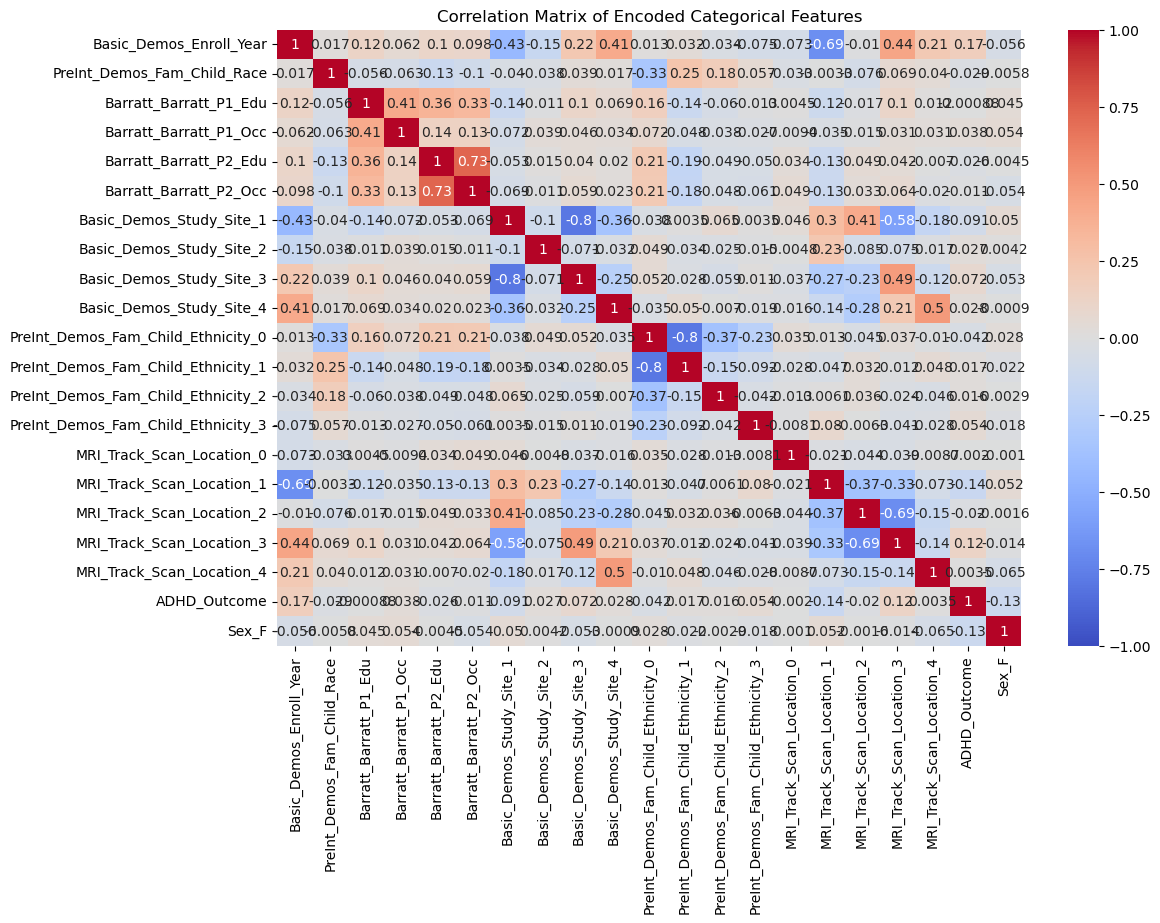

In [532]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Encoded Categorical Features")
plt.show()


Sex_F
0    797
1    416
Name: count, dtype: int64


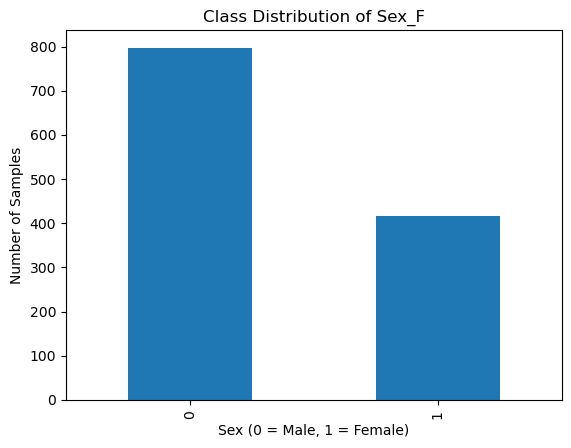

In [542]:
# Check the distribution of Sex_F (target variable)
print(df_categorical_features["Sex_F"].value_counts())

df_categorical_features["Sex_F"].value_counts().plot(kind='bar')
plt.title("Class Distribution of Sex_F")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Number of Samples")
plt.show()


## Functional Data

In [10]:
df_functional= pd.read_pickle("ProcessedData/processed_target2.pkl")

In [12]:
df_fmri=df_functional.drop(columns=["participant_id"])

In [13]:
df_fmri.head()

0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  0throw_4thcolumn  \
0          0.093473          0.146902          0.067893          0.015141   
1          0.029580          0.179323          0.112933          0.038291   
2         -0.051580          0.139734          0.068295          0.046991   
3          0.016273          0.204702          0.115980          0.043103   
4          0.065771          0.098714          0.097604          0.112988   

   0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  0throw_8thcolumn  \
0          0.070221          0.063997          0.055382         -0.035335   
1          0.104899          0.064250          0.008488          0.077505   
2          0.111085          0.026978          0.151377          0.021198   
3          0.056431          0.057615          0.055773          0.075030   
4          0.071139          0.085607          0.019392         -0.036403   

   0throw_9thcolumn  0throw_10thcolumn  ...  195throw_198thcolumn  \
0          0.068583           0.029271  ...             -0.050968   
1         -0.004750          -0.035073  ...              0.020891   
2          0.083721          -0.014275  ...              0.028773   
3          0.001033          -0.064031  ...              0.018607   
4         -0.020375           0.005426  ...             -0.047530   

   195throw_199thcolumn  196throw_197thcolumn  196throw_198thcolumn  \
0             -0.014365              0.128066              0.112646   
1              0.017754              0.094040              0.035141   
2              0.024556              0.166343              0.058925   
3              0.016193              0.072955              0.130135   
4             -0.031443              0.221213              0.007343   

   196throw_199thcolumn  197throw_198thcolumn  197throw_199thcolumn  \
0             -0.058980              0.028228              0.133582   
1              0.032537              0.075007              0.115350   
2              0.035485              0.063661              0.042862   
3              0.056120              0.084784              0.114148   
4              0.005763              0.083820              0.079582   

   198throw_199thcolumn  ADHD_Outcome  Sex_F  
0              0.143372             1      0  
1              0.138200             1      1  
2              0.162162             1      1  
3              0.190584             1      1  
4              0.067269             1      1  

[5 rows x 19902 columns]

In [43]:
# Compute correlation of fMRI features with Sex_F
corr_fmri = df_fmri.corrwith(df_fmri["Sex_F"])  # Use the correct target variable
print(corr_fmri.sort_values(ascending=False))


NameError: name 'corr_df' is not defined

In [41]:
corr_fmri_filtered = corr_fmri[corr_fmri >= 0.1]

print(corr_fmri_filtered)

0throw_69thcolumn       0.100416
1throw_135thcolumn      0.104706
25throw_114thcolumn     0.100683
28throw_188thcolumn     0.131621
31throw_66thcolumn      0.100772
34throw_65thcolumn      0.108816
34throw_167thcolumn     0.105527
39throw_180thcolumn     0.102127
43throw_166thcolumn     0.109253
47throw_193thcolumn     0.105250
59throw_104thcolumn     0.100691
67throw_132thcolumn     0.114221
70throw_149thcolumn     0.111334
73throw_133thcolumn     0.120701
74throw_184thcolumn     0.110904
86throw_196thcolumn     0.100471
87throw_191thcolumn     0.108609
90throw_183thcolumn     0.113679
97throw_180thcolumn     0.108014
111throw_149thcolumn    0.101374
133throw_182thcolumn    0.130450
164throw_189thcolumn    0.184340
167throw_175thcolumn    0.101104
172throw_188thcolumn    0.126670
173throw_198thcolumn    0.103996
180throw_183thcolumn    0.100635
183throw_196thcolumn    0.113501
183throw_197thcolumn    0.122806
184throw_185thcolumn    0.107557
191throw_192thcolumn    0.102807
191throw_1

## Feature Selection

In [561]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


X = df_fmri.drop(columns=["Sex_F"])  
y = df_fmri["Sex_F"]

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(20))  # Show top 20 important features


164throw_189thcolumn    0.002017
158throw_191thcolumn    0.001277
94throw_168thcolumn     0.001138
17throw_167thcolumn     0.001009
90throw_183thcolumn     0.000981
73throw_133thcolumn     0.000943
133throw_182thcolumn    0.000865
0throw_103thcolumn      0.000841
131throw_198thcolumn    0.000805
155throw_197thcolumn    0.000790
96throw_180thcolumn     0.000760
14throw_16thcolumn      0.000752
46throw_199thcolumn     0.000748
30throw_148thcolumn     0.000733
66throw_74thcolumn      0.000721
19throw_140thcolumn     0.000718
36throw_115thcolumn     0.000711
47throw_128thcolumn     0.000682
80throw_100thcolumn     0.000677
79throw_166thcolumn     0.000673
dtype: float64


In [651]:
df1_target= pd.read_pickle("ProcessedData/processed_target1.pkl")

In [653]:
df1_target=df1_target.drop(columns=["participant_id"])

In [655]:
df1_target.head()

Basic_Demos_Enroll_Year  PreInt_Demos_Fam_Child_Race  \
0                     2016                            0   
1                     2019                            2   
2                     2016                            8   
3                     2018                            8   
4                     2019                            1   

   Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  Barratt_Barratt_P2_Edu  \
0                      21                      45                      21   
1                      15                      15                       0   
2                      18                      40                       0   
3                      15                      30                      18   
4                      15                      20                       0   

   Barratt_Barratt_P2_Occ  Basic_Demos_Study_Site_1  Basic_Demos_Study_Site_2  \
0                      45                         1                         0   
1                       0                         0                         0   
2                       0                         1                         0   
3                       0                         0                         0   
4                       0                         0                         0   

   Basic_Demos_Study_Site_3  Basic_Demos_Study_Site_4  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         1                         0   
4                         1                         0   

   PreInt_Demos_Fam_Child_Ethnicity_0  PreInt_Demos_Fam_Child_Ethnicity_1  \
0                                   1                                   0   
1                                   0                                   1   
2                                   0                                   1   
3                                   1                                   0   
4                                   1                                   0   

   PreInt_Demos_Fam_Child_Ethnicity_2  PreInt_Demos_Fam_Child_Ethnicity_3  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   MRI_Track_Scan_Location_0  MRI_Track_Scan_Location_1  \
0                          0                          1   
1                          0                          0   
2                          0                          1   
3                          0                          0   
4                          0                          0   

   MRI_Track_Scan_Location_2  MRI_Track_Scan_Location_3  \
0                          0                          0   
1                          0                          1   
2                          0                          0   
3                          0                          1   
4                          0                          1   

   MRI_Track_Scan_Location_4  EHQ_EHQ_Total  ColorVision_CV_Score  \
0                          0          40.00                  13.0   
1                          0         -94.47                  14.0   
2                          0         -46.67                  14.0   
3                          0         -26.68                  10.0   
4                          0           0.00                  14.0   

   APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  \
0             3.0            10.0             47.0             13.0   
1             3.0            13.0             34.0             18.0   
2             4.0            10.0             35.0             16.0   
3             5.0   

In [657]:
df1_target.columns

Index(['Basic_Demos_Enroll_Year', 'PreInt_Demos_Fam_Child_Race',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ',
       'Basic_Demos_Study_Site_1', 'Basic_Demos_Study_Site_2',
       'Basic_Demos_Study_Site_3', 'Basic_Demos_Study_Site_4',
       'PreInt_Demos_Fam_Child_Ethnicity_0',
       'PreInt_Demos_Fam_Child_Ethnicity_1',
       'PreInt_Demos_Fam_Child_Ethnicity_2',
       'PreInt_Demos_Fam_Child_Ethnicity_3', 'MRI_Track_Scan_Location_0',
       'MRI_Track_Scan_Location_1', 'MRI_Track_Scan_Location_2',
       'MRI_Track_Scan_Location_3', 'MRI_Track_Scan_Location_4',
       'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP',
       'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
       'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperact

In [659]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for df1_target
corr_matrix = df1_target.corr()

# Display the correlation matrix
print(corr_matrix)


                                    Basic_Demos_Enroll_Year  \
Basic_Demos_Enroll_Year                            1.000000   
PreInt_Demos_Fam_Child_Race                        0.017209   
Barratt_Barratt_P1_Edu                             0.118140   
Barratt_Barratt_P1_Occ                             0.061509   
Barratt_Barratt_P2_Edu                             0.103347   
Barratt_Barratt_P2_Occ                             0.097671   
Basic_Demos_Study_Site_1                          -0.430542   
Basic_Demos_Study_Site_2                          -0.148603   
Basic_Demos_Study_Site_3                           0.223624   
Basic_Demos_Study_Site_4                           0.407879   
PreInt_Demos_Fam_Child_Ethnicity_0                 0.013172   
PreInt_Demos_Fam_Child_Ethnicity_1                 0.032464   
PreInt_Demos_Fam_Child_Ethnicity_2                -0.033785   
PreInt_Demos_Fam_Child_Ethnicity_3                -0.075495   
MRI_Track_Scan_Location_0                         -0.07

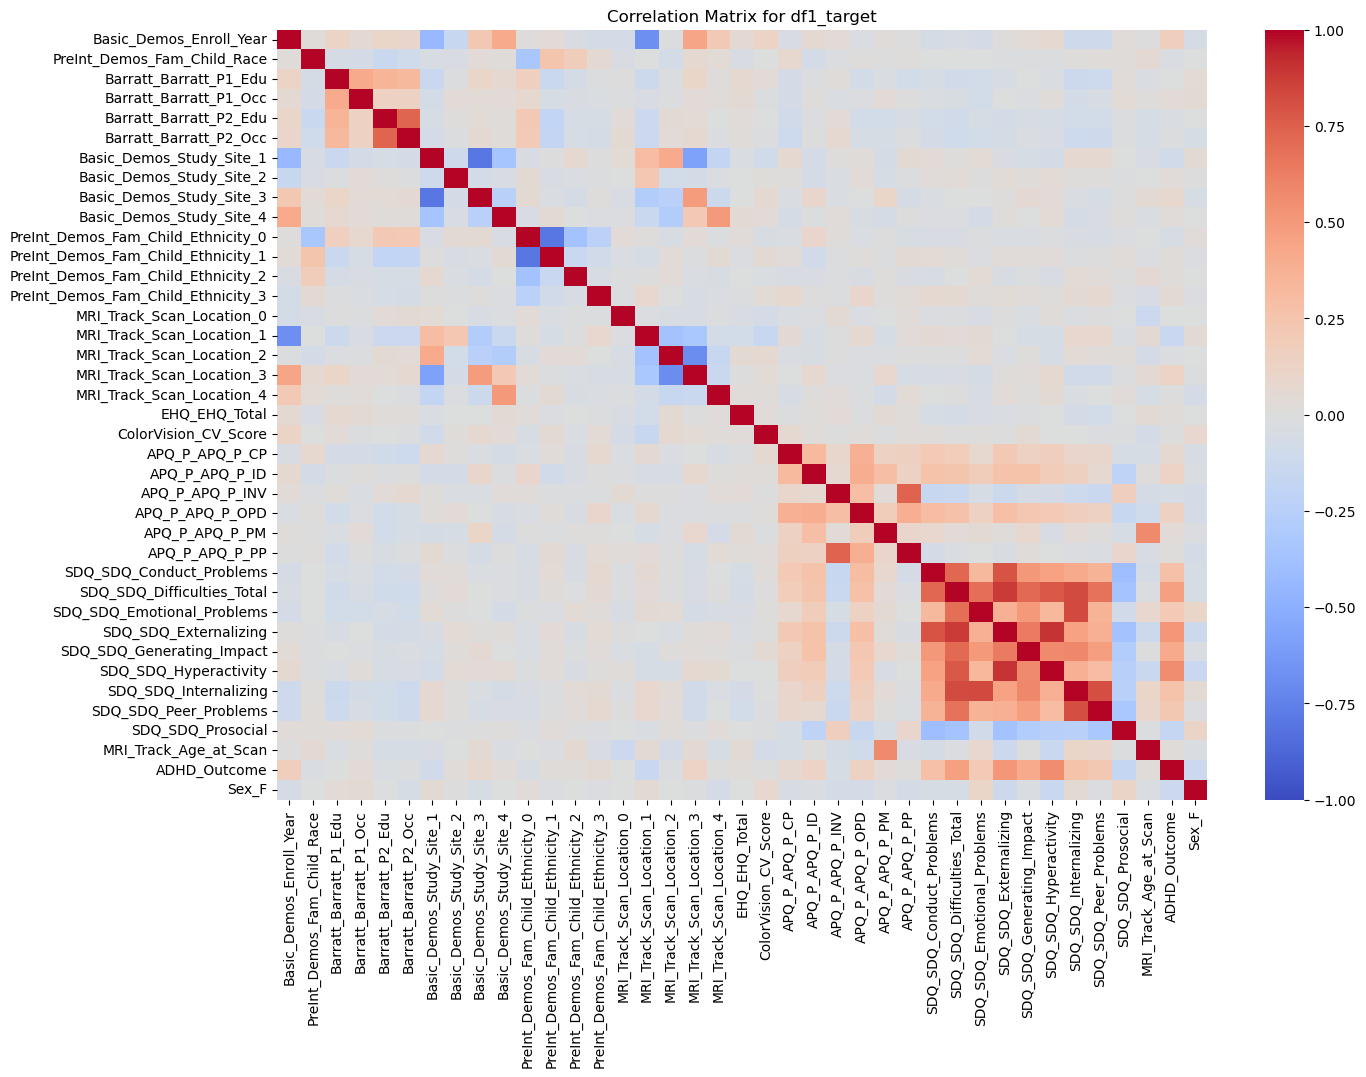

In [661]:
# Set up the figure size

plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)

# Set title
plt.title("Correlation Matrix for df1_target")

# Show the plot
plt.show()


In [662]:
import numpy as np

# Compute the correlation matrix
corr_matrix = df1_target.corr()

# Mask the upper triangle + diagonal to remove self-correlations
mask = np.triu(np.ones(corr_matrix.shape), k=0)  # k=0 keeps only the lower triangle

# Convert the correlation matrix to a DataFrame with feature pairs
corr_pairs = corr_matrix.where(mask == 0).stack().sort_values(ascending=False)

# Show only correlations stronger than ±0.3
strong_corrs = corr_pairs[abs(corr_pairs) > 0.5]
print(strong_corrs)



SDQ_SDQ_Hyperactivity               SDQ_SDQ_Externalizing                 0.901635
SDQ_SDQ_Externalizing               SDQ_SDQ_Difficulties_Total            0.880004
SDQ_SDQ_Internalizing               SDQ_SDQ_Emotional_Problems            0.833418
                                    SDQ_SDQ_Difficulties_Total            0.826949
SDQ_SDQ_Peer_Problems               SDQ_SDQ_Internalizing                 0.819531
SDQ_SDQ_Externalizing               SDQ_SDQ_Conduct_Problems              0.795178
SDQ_SDQ_Hyperactivity               SDQ_SDQ_Difficulties_Total            0.775414
APQ_P_APQ_P_PP                      APQ_P_APQ_P_INV                       0.739292
Barratt_Barratt_P2_Occ              Barratt_Barratt_P2_Edu                0.728974
SDQ_SDQ_Difficulties_Total          SDQ_SDQ_Conduct_Problems              0.725036
SDQ_SDQ_Generating_Impact           SDQ_SDQ_Difficulties_Total            0.717915
SDQ_SDQ_Emotional_Problems          SDQ_SDQ_Difficulties_Total            0.687964
SDQ_

In [665]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define X (features) and y (target)
X = df1_target.drop(columns=["Sex_F"])  # Drop target column
y = df1_target["Sex_F"]

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(20))  # Show top 20 important features


MRI_Track_Age_at_Scan          0.071601
APQ_P_APQ_P_INV                0.054670
EHQ_EHQ_Total                  0.051918
APQ_P_APQ_P_ID                 0.051179
APQ_P_APQ_P_PM                 0.047581
APQ_P_APQ_P_OPD                0.046687
APQ_P_APQ_P_PP                 0.045520
SDQ_SDQ_Difficulties_Total     0.045063
SDQ_SDQ_Externalizing          0.042039
SDQ_SDQ_Hyperactivity          0.041776
SDQ_SDQ_Internalizing          0.041546
SDQ_SDQ_Emotional_Problems     0.039531
SDQ_SDQ_Generating_Impact      0.036046
SDQ_SDQ_Prosocial              0.035676
Barratt_Barratt_P2_Occ         0.034605
Barratt_Barratt_P1_Occ         0.033436
SDQ_SDQ_Peer_Problems          0.029786
Barratt_Barratt_P2_Edu         0.027115
SDQ_SDQ_Conduct_Problems       0.026605
PreInt_Demos_Fam_Child_Race    0.025324
dtype: float64


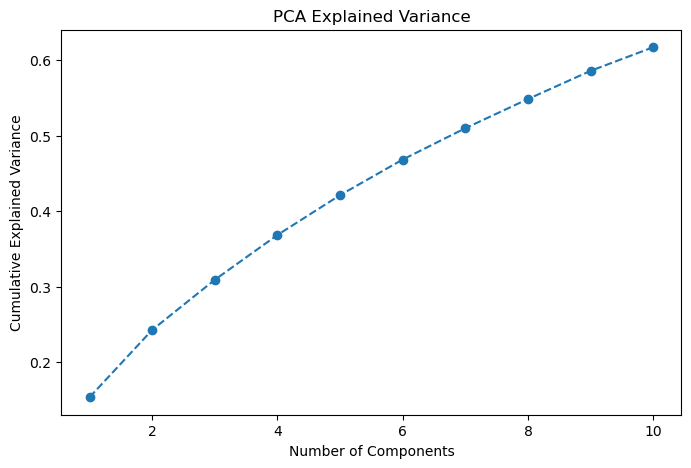

In [666]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1_target.drop(columns=["Sex_F"]))

# Apply PCA
pca = PCA(n_components=10)  # Keep top 10 components
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


In [669]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df1_target["Cluster"] = kmeans.fit_predict(X)

# Compare clusters with `Sex_F`
print(pd.crosstab(df1_target["Cluster"], df1_target["Sex_F"]))


Sex_F      0    1
Cluster          
0        653  339
1        144   77


C:\Users\Aliso\anaconda3\envs\wids-datathon\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


## 

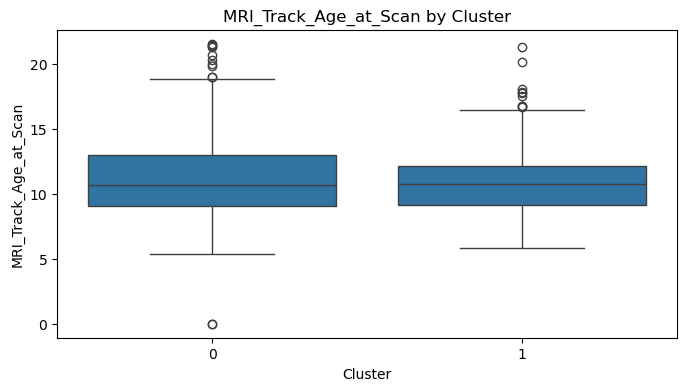

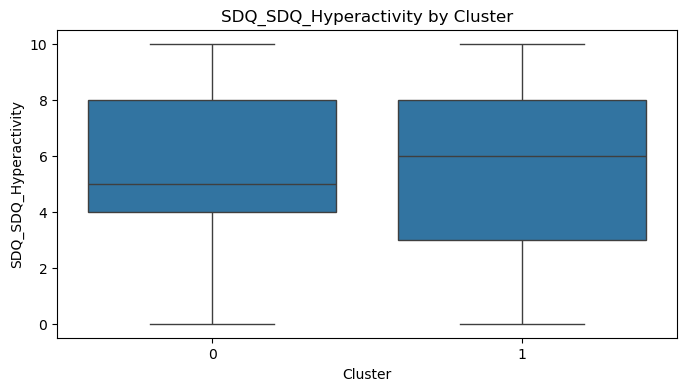

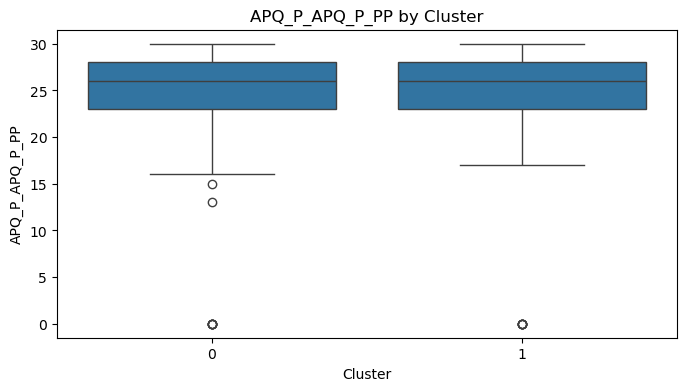

In [671]:


# Select a few key features
features_to_check = ["MRI_Track_Age_at_Scan", "SDQ_SDQ_Hyperactivity", "APQ_P_APQ_P_PP"]

# Plot distributions of these features across clusters
for feature in features_to_check:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df1_target["Cluster"], y=df1_target[feature])
    plt.title(f"{feature} by Cluster")
    plt.show()


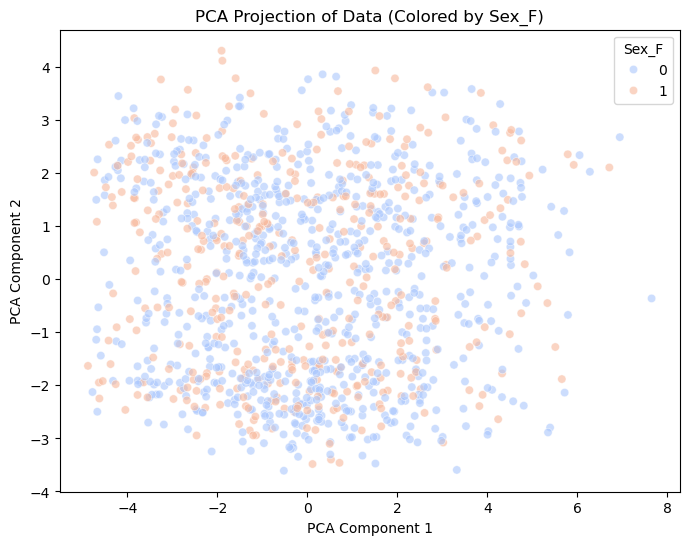

In [673]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data before PCA
X_scaled = StandardScaler().fit_transform(df1_target.drop(columns=["Sex_F", "Cluster"]))

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1_target["Sex_F"], palette="coolwarm", alpha=0.6)
plt.title("PCA Projection of Data (Colored by Sex_F)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [675]:
# Upsample minority class (females) to match number of males
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # Duplicate existing samples
                                 n_samples=len(df_majority),  # Match number of males
                                 random_state=42)

# Combine the upsampled minority class with majority class
df1_target_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the data
df1_target_balanced = df1_target_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df1_target_balanced["Sex_F"].value_counts())


Sex_F
1    797
0    797
Name: count, dtype: int64


In [683]:
df1_target_balanced.describe()

Basic_Demos_Enroll_Year  PreInt_Demos_Fam_Child_Race  \
count              1594.000000                  1594.000000   
mean               2017.616688                     2.031995   
std                   1.130748                     3.120450   
min                2015.000000                     0.000000   
25%                2017.000000                     0.000000   
50%                2018.000000                     0.000000   
75%                2019.000000                     2.000000   
max                2020.000000                    11.000000   

       Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  Barratt_Barratt_P2_Edu  \
count             1594.000000             1594.000000             1594.000000   
mean                17.764743               25.119197               14.217064   
std                  3.910870               16.812495                7.206962   
min                  0.000000                0.000000                0.000000   
25%                 18.000000                0.000000               12.000000   
50%                 18.000000               30.000000               18.000000   
75%                 21.000000               40.000000               21.000000   
max                 21.000000               45.000000               21.000000   

       Barratt_Barratt_P2_Occ  Basic_Demos_Study_Site_1  \
count             1594.000000               1594.000000   
mean                24.632999                  0.547679   
std                 17.120200                  0.497878   
min                  0.000000                  0.000000   
25%                  5.000000                  0.000000   
50%                 30.000000                  1.000000   
75%                 40.000000                  1.000000   
max                 45.000000                  1.000000   

       Basic_Demos_Study_Site_2  Basic_Demos_Study_Site_3  \
count               1594.000000               1594.000000   
mean                   0.006901                  0.340652   
std                    0.082810                  0.474077   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  1.000000   
max                    1.000000                  1.000000   

       Basic_Demos_Study_Site_4  PreInt_Demos_Fam_Child_Ethnicity_0  \
count               1594.000000                         1594.000000   
mean                   0.104768                            0.677541   
std                    0.306350                            0.467564   
min                    0.000000                            0.000000   
25%                    0.000000                            0.000000   
50%                    0.000000                            1.000000   
75%                    0.000000                            1.000000   
max                    1.000000                            1.000000   

       PreInt_Demos_Fam_Child_Ethnicity_1  PreInt_Demos_Fam_Child_Ethnicity_2  \
count                         1594.000000                         1594.000000   
mean                             0.235885                            0.064617   
std                              0.424684                            0.245927   
min                              0.000000                            0.000000   
25%                              0.000000                            0.000000   
50%                              0.000000                            0.000000   
75%                              0.000000                            0.000000   
max                              1.000000                            1.000000   

       PreInt_Demos_Fam_Child_Ethnicity_3  MRI_Track_Scan_Location_0  \
count                         1594.000000                1594.000000   
mean                             0.021957                   0.002509   
std                              0.146590

In [697]:

# Compute correlation matrix
corr_matrix_df1 = df1_target_balanced.corr()

# Extract only correlations with Sex_F
corr_with_sex = corr_matrix_df1[["Sex_F"]].sort_values(by="Sex_F", ascending=False)
print(corr_with_sex)


                                           Sex_F
Sex_F                               1.000000e+00
SDQ_SDQ_Prosocial                   1.407206e-01
SDQ_SDQ_Emotional_Problems          1.338284e-01
ColorVision_CV_Score                9.539507e-02
SDQ_SDQ_Internalizing               7.565863e-02
MRI_Track_Scan_Location_1           7.016548e-02
Barratt_Barratt_P1_Edu              6.498747e-02
Basic_Demos_Study_Site_1            5.672020e-02
Barratt_Barratt_P1_Occ              5.300345e-02
PreInt_Demos_Fam_Child_Ethnicity_0  4.294934e-02
Basic_Demos_Study_Site_4            1.843624e-02
Cluster                             1.130791e-02
Barratt_Barratt_P2_Edu              9.926601e-03
EHQ_EHQ_Total                       3.413165e-03
PreInt_Demos_Fam_Child_Ethnicity_2  2.551776e-03
MRI_Track_Scan_Location_0          -5.883950e-18
MRI_Track_Age_at_Scan              -5.972612e-04
APQ_P_APQ_P_PM                     -7.767748e-03
SDQ_SDQ_Generating_Impact          -9.131967e-03
MRI_Track_Scan_Locat

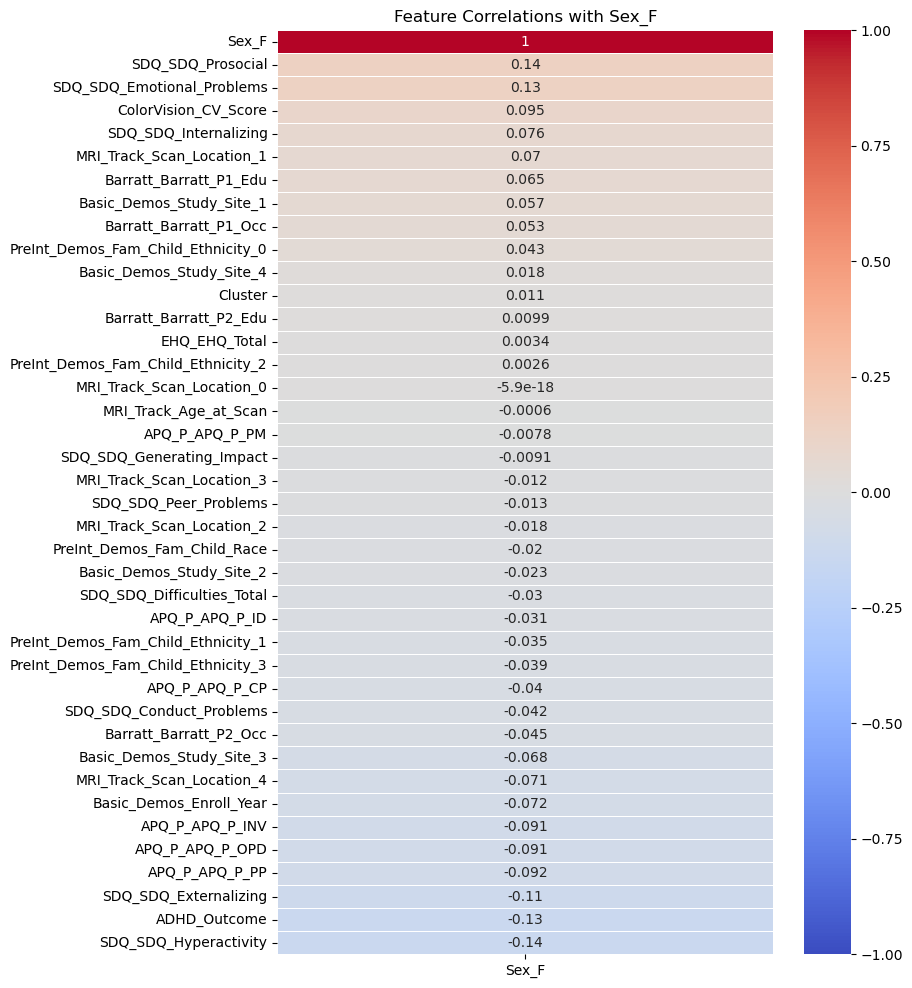

In [699]:
# Set figure size
plt.figure(figsize=(8, 12))

# Create heatmap
sns.heatmap(corr_with_sex, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Set title
plt.title("Feature Correlations with Sex_F")

# Show plot
plt.show()


In [701]:
from sklearn.utils import resample

# Separate majority (males) and minority (females) classes
df_majority = df1_target[df1_target["Sex_F"] == 0]  # Males
df_minority = df1_target[df1_target["Sex_F"] == 1]  # Females

# Downsample majority class (males) to match number of females
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # No replacement, just removing excess
                                   n_samples=len(df_minority),  # Match number of females
                                   random_state=42)  

# Combine the downsampled majority class with minority class
df1_target_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the data to prevent ordering bias
df1_target_balanced = df1_target_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df1_target_balanced["Sex_F"].value_counts())


Sex_F
1    416
0    416
Name: count, dtype: int64


                                    Basic_Demos_Enroll_Year  \
Basic_Demos_Enroll_Year                            1.000000   
PreInt_Demos_Fam_Child_Race                        0.030406   
Barratt_Barratt_P1_Edu                             0.118875   
Barratt_Barratt_P1_Occ                             0.032909   
Barratt_Barratt_P2_Edu                             0.084808   
Barratt_Barratt_P2_Occ                             0.097257   
Basic_Demos_Study_Site_1                          -0.452911   
Basic_Demos_Study_Site_2                          -0.132984   
Basic_Demos_Study_Site_3                           0.246017   
Basic_Demos_Study_Site_4                           0.409024   
PreInt_Demos_Fam_Child_Ethnicity_0                 0.019732   
PreInt_Demos_Fam_Child_Ethnicity_1                 0.031242   
PreInt_Demos_Fam_Child_Ethnicity_2                -0.028326   
PreInt_Demos_Fam_Child_Ethnicity_3                -0.092196   
MRI_Track_Scan_Location_0                         -0.08

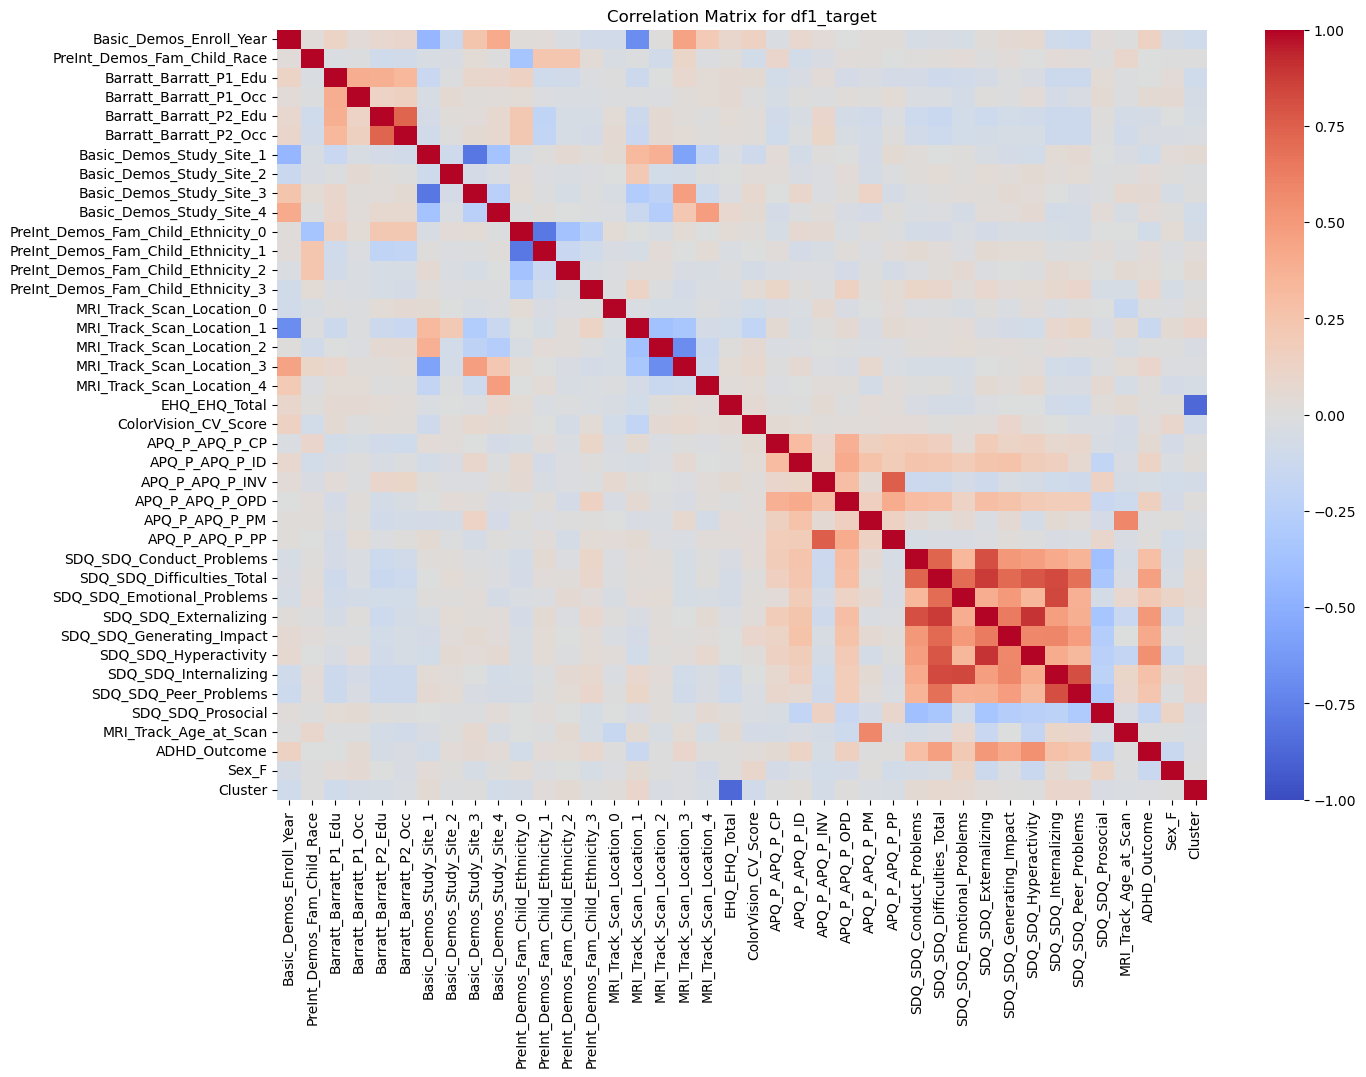

In [647]:
# Set up the figure size
corr_matrix_df1 = df1_target_balanced.corr()

# Display the correlation matrix
print(corr_matrix)

plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)

# Set title
plt.title("Correlation Matrix for df1_target")

# Show the plot
plt.show()

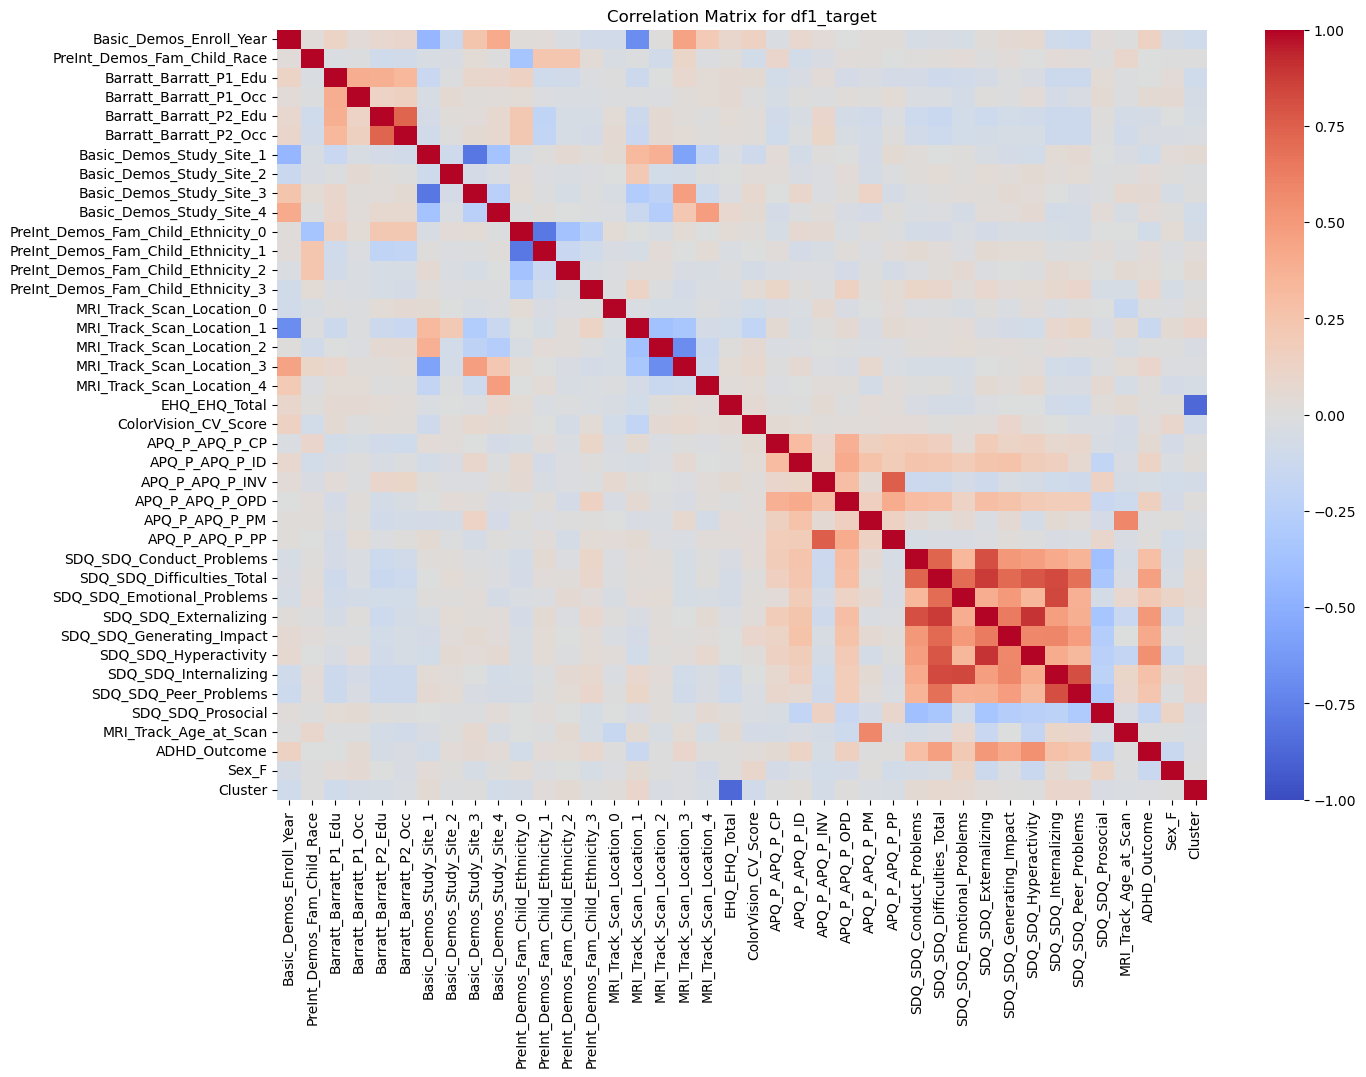

In [649]:

plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(corr_matrix_df1, annot=False, cmap="coolwarm", vmin=-1, vmax=1)

# Set title
plt.title("Correlation Matrix for df1_target")

# Show the plot
plt.show()
